In [13]:
print("Importing packages")

import os
import pickle
import numpy as np
import random

from osl_dynamics.simulation import HMM_MVN, MDyn_HMM_MVN
# from osl_dynamics import simulation
from osl_dynamics.data import Data
from osl_dynamics.models.hmm import Config, Model
from osl_dynamics.inference import modes, metrics
from osl_dynamics.utils import plotting


Importing packages


In [14]:
"""Example script for running HMM inference on simulated HMM-MVN data.

This script should take less than a couple minutes to run and
achieve a dice coefficient of ~0.99.
"""

# Set random seed
random.seed(15)

# Create directory for results
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

#%% Simulate data
n_states = 5
n_channels = 11

print("Simulating data")
sim = HMM_MVN(
    n_samples=25600,
    n_states=n_states,
    n_channels=n_channels,
    trans_prob="sequence",
    stay_prob=0.9,
    means="zero",
    covariances="random",
)

# Create Data object for training
data = Data(sim.time_series)

# Prepare data
data.standardize()

#%% Build model

config = Config(
    n_states=n_states,
    n_channels=n_channels,
    sequence_length=200,
    learn_means=False,
    learn_covariances=True,
    batch_size=16,
    learning_rate=0.01,
    n_epochs=20,
)

model = Model(config)
model.summary()

#%% Train model

# Initialization
init_history = model.random_state_time_course_initialization(data, n_init=3, n_epochs=1)

# Full training
history = model.fit(data)

# Calculate the free energy
free_energy = model.free_energy(data)
history["free_energy"] = free_energy


#%% Get inferred parameters

# Inferred state probabilities
alp = model.get_alpha(data)

# Observation model parameters
means, covs = model.get_means_covariances()

# Viterbi path
stc = modes.argmax_time_courses(alp)

#%% Compare inferred parameters to ground truth simulation

# Re-order simulated state time courses to match inferred
inf_stc, sim_stc = modes.match_modes(stc, sim.state_time_course)

# Calculate dice coefficient
dice = metrics.dice_coefficient(inf_stc, sim_stc)

print("Dice coefficient:", dice)

#%% Delete temporary directory

data.delete_dir()

Simulating data


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

Standardize:   0%|          | 0/1 [00:00<?, ?it/s]

2025-03-13 09:49:21.323158: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-03-13 09:49:21.323261: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2025-03-13 09:49:21.323308: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (win000.hpc.in.bmrc.ox.ac.uk): /proc/driver/nvidia/version does not exist
2025-03-13 09:49:21.324236: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "HMM"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 200, 16)]    0           []                               
                                                                                                  
 tf.split (TFOpLambda)          [(None, 200, 11),    0           ['inputs[0][0]']                 
                                 (None, 200, 5)]                                                  
                                                                                                  
 static_loss_scaling_factor (St  ()                  0           ['tf.split[0][0]']               
 aticLossScalingFactorLayer)                                                                      
                                                                                                

2025-03-13 09:49:23 INFO osl-dynamics [hmm.py:485:random_state_time_course_initialization]: Random state time course initialization
2025-03-13 09:49:23 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 0
2025-03-13 09:49:23 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
8/8 [==============================] - 12s 216ms/step - rho: 0.2853 - lr: 0.0100 - loss: 14.6417


2025-03-13 09:49:35 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 1
2025-03-13 09:49:35 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
8/8 [==============================] - 4s 185ms/step - rho: 0.2853 - lr: 0.0100 - loss: 14.5985


2025-03-13 09:49:39 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 2
2025-03-13 09:49:39 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
8/8 [==============================] - 4s 166ms/step - rho: 0.2853 - lr: 0.0100 - loss: 14.6087


2025-03-13 09:49:43 INFO osl-dynamics [hmm.py:522:random_state_time_course_initialization]: Using initialization 1


Epoch 1/20
8/8 [==============================] - 1s 162ms/step - rho: 0.2853 - lr: 0.0100 - loss: 13.9616
Epoch 2/20
8/8 [==============================] - 1s 156ms/step - rho: 0.1866 - lr: 0.0090 - loss: 13.4501
Epoch 3/20
8/8 [==============================] - 1s 154ms/step - rho: 0.1436 - lr: 0.0082 - loss: 12.9477
Epoch 4/20
8/8 [==============================] - 1s 151ms/step - rho: 0.1187 - lr: 0.0074 - loss: 12.5252
Epoch 5/20
8/8 [==============================] - 1s 161ms/step - rho: 0.1022 - lr: 0.0067 - loss: 12.1797
Epoch 6/20
8/8 [==============================] - 1s 159ms/step - rho: 0.0904 - lr: 0.0061 - loss: 11.9056
Epoch 7/20
8/8 [==============================] - 1s 151ms/step - rho: 0.0814 - lr: 0.0055 - loss: 11.6875
Epoch 8/20
8/8 [==============================] - 1s 162ms/step - rho: 0.0743 - lr: 0.0050 - loss: 11.5099
Epoch 9/20
8/8 [==============================] - 1s 156ms/step - rho: 0.0686 - lr: 0.0045 - loss: 11.3671
Epoch 10/20
8/8 [====================

2025-03-13 09:50:09 INFO osl-dynamics [hmm.py:1118:free_energy]: Getting free energy
2025-03-13 09:50:10 INFO osl-dynamics [hmm.py:1311:get_alpha]: Getting alpha


Dice coefficient: 0.9978515625


Dice coefficient: 0.9978515625


(<Figure size 1200x250 with 2 Axes>,
 [<Axes: title={'center': 'Inferred $\\alpha$'}, xlabel='Sample', ylabel='$\\alpha_{jt}$'>])

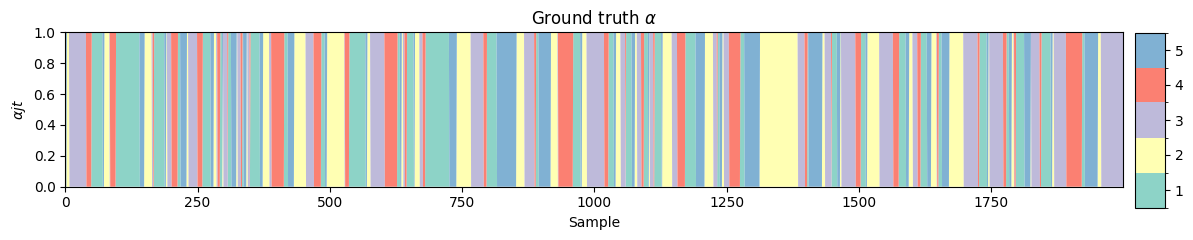

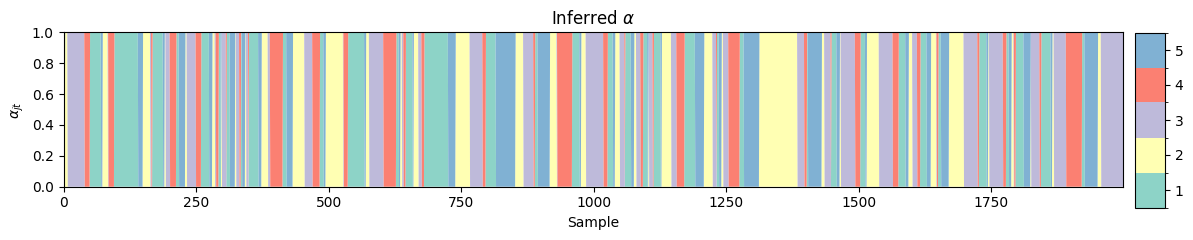

In [15]:
print("Dice coefficient:", dice)

plotting.plot_alpha(
    inf_stc,
    n_samples=2000,
    title="Ground truth " + r"$\alpha$",
    y_labels=r"$\alpha{jt}$",
    # filename="figures_BG/sim_beta.png",
)

plotting.plot_alpha(
    sim_stc,
    n_samples=2000,
    title="Inferred " + r"$\alpha$",
    y_labels=r"$\alpha_{jt}$",
    # filename="figures_BG/inf_beta.png",
)



In [19]:
len(sim.mode_time_course)

25600

In [22]:
"""Example script for running HMM inference on simulated HMM-MVN data.

This script should take less than a couple minutes to run and
achieve a dice coefficient of ~0.99.
"""

# Set random seed
random.seed(63)

# Create directory for results
results_dir = "results"
os.makedirs(results_dir, exist_ok=True)

#%% Simulate data
n_states = 5
n_channels = 11

# print("Simulating data")
# sim = HMM_MVN(
#     n_samples=25600,
#     n_states=n_states,
#     n_channels=n_channels,
#     trans_prob="sequence",
#     stay_prob=0.9,
#     means="zero",
#     covariances="random",
# )

sim = MDyn_HMM_MVN(
    n_samples=25600,
    n_modes=n_states,
    n_states=n_states,
    n_channels=n_channels,
    trans_prob="sequence",
    stay_prob=0.9,
    means="random",
    covariances="random",
)

# sim_alpha = time series made by time-varying means only
# sim_beta = time series made by time-varying correlations only
# sim_gamma = time series made by time-varying variances only
sim_alpha_stc, sim_beta_stc, sim_gamma_stc = sim.mode_time_course
sim_alpha_time_series = sim.time_series_means
sim_beta_time_series = sim.time_series_corrs
sim_gamma_time_series = sim.time_series_stds

# Create Data object for training
data_alpha = Data(sim_alpha_time_series)
data_beta = Data(sim_beta_time_series)
data_gamma = Data(sim_gamma_time_series)

# Prepare data
data.standardize()

#%% Build model

# config = Config(
#     n_states=5,
#     n_channels=11,
#     sequence_length=200,
#     learn_means=False,
#     learn_covariances=True,
#     batch_size=16,
#     learning_rate=0.01,
#     n_epochs=20,
# )

config_alpha = Config(
    n_states=n_states,
    n_channels=n_channels,
    sequence_length=400,
    learn_means=True,
    learn_covariances=False,
    learn_trans_prob=True,
    # initial_trans_prob=initial_trans_prob,
    batch_size=16,
    learning_rate=0.01,
    n_epochs=20,
)

config_beta = Config(
    n_states=n_states,
    n_channels=n_channels,
    sequence_length=400,
    learn_means=False,
    learn_covariances=True,
    learn_trans_prob=True,
    # initial_trans_prob=initial_trans_prob,
    batch_size=16,
    learning_rate=0.01,
    n_epochs=20,
)

config_gamma = Config(
    n_states=n_states,
    n_channels=n_channels,
    sequence_length=400,
    learn_means=False,
    learn_covariances=True,
    diagonal_covariances=True,
    learn_trans_prob=True,
    # initial_trans_prob=initial_trans_prob,
    batch_size=16,
    learning_rate=0.01,
    n_epochs=20,
)

model_alpha = Model(config_alpha)
model_beta = Model(config_beta)
model_gamma = Model(config_gamma)
# model.summary()

#%% Train model

# Initialization
init_history_alpha = model_alpha.random_state_time_course_initialization(data_alpha, n_init=3, n_epochs=1)
init_history_beta = model_beta.random_state_time_course_initialization(data_beta, n_init=3, n_epochs=1)
init_history_gamma = model_gamma.random_state_time_course_initialization(data_gamma, n_init=3, n_epochs=1)

# Full training
history_alpha = model_alpha.fit(data_alpha)
history_beta = model_beta.fit(data_beta)
history_gamma = model_gamma.fit(data_gamma)

# Calculate the free energy
free_energy_alpha = model_alpha.free_energy(data_alpha)
free_energy_beta = model_beta.free_energy(data_beta)
free_energy_gamma = model_gamma.free_energy(data_gamma)

#%% Get inferred parameters

# Inferred state probabilities
alp_alpha = model_alpha.get_alpha(data_alpha)
alp_beta = model_beta.get_alpha(data_beta)
alp_gamma = model_gamma.get_alpha(data_gamma)

# Observation model parameters
means_alpha, covs_alpha = model_alpha.get_means_covariances()
means_beta, covs_beta = model_beta.get_means_covariances()
means_gamma, covs_gamma = model_gamma.get_means_covariances()

# Viterbi path
stc_alpha = modes.argmax_time_courses(alp_alpha)
stc_beta = modes.argmax_time_courses(alp_beta)
stc_gamma = modes.argmax_time_courses(alp_gamma)

#%% Compare inferred parameters to ground truth simulation

# Re-order simulated state time courses to match inferred
inf_stc_alpha, sim_stc_alpha = modes.match_modes(stc_alpha, sim_alpha_stc)
inf_stc_beta, sim_stc_beta = modes.match_modes(stc_beta, sim_beta_stc)
inf_stc_gamma, sim_stc_gamma = modes.match_modes(stc_gamma, sim_gamma_stc)

# Calculate dice coefficient
dice_alpha = metrics.dice_coefficient(inf_stc_alpha, sim_stc_alpha)
dice_beta = metrics.dice_coefficient(inf_stc_beta, sim_stc_beta)
dice_gamma = metrics.dice_coefficient(inf_stc_gamma, sim_stc_gamma)

print("Dice coefficient (Alpha):", dice_alpha)
print("Dice coefficient (Beta):", dice_beta)
print("Dice coefficient (gamma):", dice_gamma)

#%% Delete temporary directory

data.delete_dir()

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

Standardize:   0%|          | 0/1 [00:00<?, ?it/s]

2025-03-13 09:54:54 INFO osl-dynamics [hmm.py:485:random_state_time_course_initialization]: Random state time course initialization
2025-03-13 09:54:54 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 0
2025-03-13 09:54:54 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
4/4 [==============================] - 4s 206ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.8224


2025-03-13 09:54:58 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 1
2025-03-13 09:54:58 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
4/4 [==============================] - 3s 252ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.8230


2025-03-13 09:55:02 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 2
2025-03-13 09:55:02 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
4/4 [==============================] - 4s 246ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.8240


2025-03-13 09:55:06 INFO osl-dynamics [hmm.py:522:random_state_time_course_initialization]: Using initialization 0
2025-03-13 09:55:06 INFO osl-dynamics [hmm.py:485:random_state_time_course_initialization]: Random state time course initialization
2025-03-13 09:55:06 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 0
2025-03-13 09:55:06 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
4/4 [==============================] - 4s 193ms/step - rho: 0.2853 - lr: 0.0100 - loss: 14.6359


2025-03-13 09:55:10 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 1
2025-03-13 09:55:10 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
4/4 [==============================] - 3s 207ms/step - rho: 0.2853 - lr: 0.0100 - loss: 14.6281


2025-03-13 09:55:14 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 2
2025-03-13 09:55:14 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
4/4 [==============================] - 3s 208ms/step - rho: 0.2853 - lr: 0.0100 - loss: 14.6150


2025-03-13 09:55:17 INFO osl-dynamics [hmm.py:522:random_state_time_course_initialization]: Using initialization 2
2025-03-13 09:55:17 INFO osl-dynamics [hmm.py:485:random_state_time_course_initialization]: Random state time course initialization
2025-03-13 09:55:17 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 0
2025-03-13 09:55:17 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
4/4 [==============================] - 4s 446ms/step - rho: 0.2853 - lr: 0.0100 - loss: 4.3150


2025-03-13 09:55:22 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 1
2025-03-13 09:55:22 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
4/4 [==============================] - 4s 218ms/step - rho: 0.2853 - lr: 0.0100 - loss: 4.3128


2025-03-13 09:55:26 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 2
2025-03-13 09:55:26 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
4/4 [==============================] - 4s 247ms/step - rho: 0.2853 - lr: 0.0100 - loss: 4.3133


2025-03-13 09:55:30 INFO osl-dynamics [hmm.py:522:random_state_time_course_initialization]: Using initialization 1


Epoch 1/20
4/4 [==============================] - 1s 245ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.8131
Epoch 2/20
4/4 [==============================] - 1s 232ms/step - rho: 0.1866 - lr: 0.0090 - loss: 15.7997
Epoch 3/20
4/4 [==============================] - 1s 173ms/step - rho: 0.1436 - lr: 0.0082 - loss: 15.7836
Epoch 4/20
4/4 [==============================] - 1s 174ms/step - rho: 0.1187 - lr: 0.0074 - loss: 15.7666
Epoch 5/20
4/4 [==============================] - 1s 184ms/step - rho: 0.1022 - lr: 0.0067 - loss: 15.7487
Epoch 6/20
4/4 [==============================] - 1s 178ms/step - rho: 0.0904 - lr: 0.0061 - loss: 15.7321
Epoch 7/20
4/4 [==============================] - 1s 172ms/step - rho: 0.0814 - lr: 0.0055 - loss: 15.7165
Epoch 8/20
4/4 [==============================] - 1s 169ms/step - rho: 0.0743 - lr: 0.0050 - loss: 15.7029
Epoch 9/20
4/4 [==============================] - 1s 173ms/step - rho: 0.0686 - lr: 0.0045 - loss: 15.6913
Epoch 10/20
4/4 [====================

2025-03-13 09:56:15 INFO osl-dynamics [hmm.py:1118:free_energy]: Getting free energy
2025-03-13 09:56:16 INFO osl-dynamics [hmm.py:1118:free_energy]: Getting free energy
2025-03-13 09:56:16 INFO osl-dynamics [hmm.py:1118:free_energy]: Getting free energy
2025-03-13 09:56:17 INFO osl-dynamics [hmm.py:1311:get_alpha]: Getting alpha
2025-03-13 09:56:17 INFO osl-dynamics [hmm.py:1311:get_alpha]: Getting alpha
2025-03-13 09:56:18 INFO osl-dynamics [hmm.py:1311:get_alpha]: Getting alpha


Dice coefficient (Alpha): 0.673125
Dice coefficient (Beta): 0.218984375
Dice coefficient (gamma): 0.2118359375


Dice coefficient (Alpha): 0.673125
Dice coefficient (Beta): 0.218984375
Dice coefficient (gamma): 0.2118359375


(<Figure size 1200x250 with 2 Axes>,
 [<Axes: title={'center': 'Inferred $\\alpha$'}, xlabel='Sample', ylabel='$\\alpha_{jt}$'>])

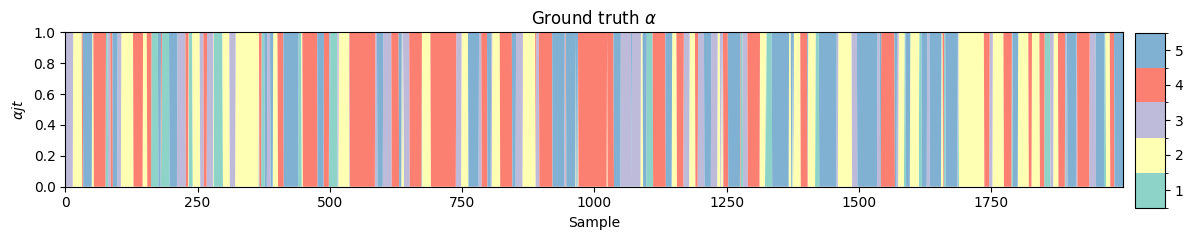

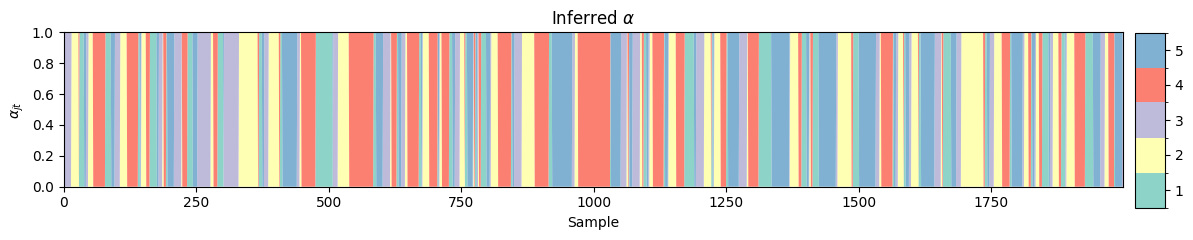

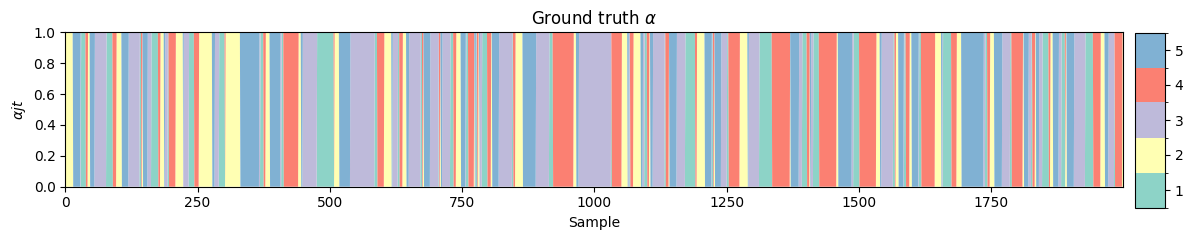

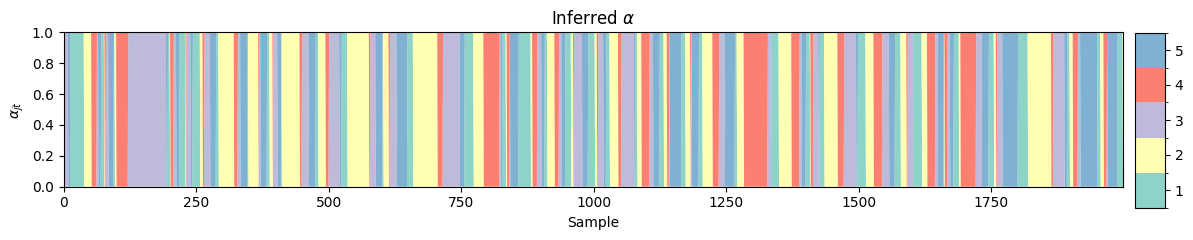

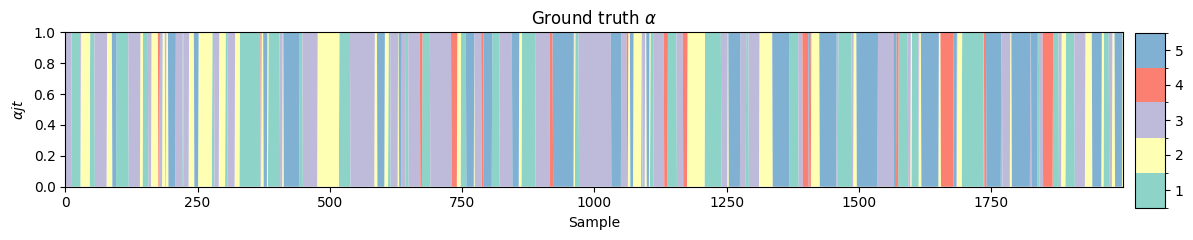

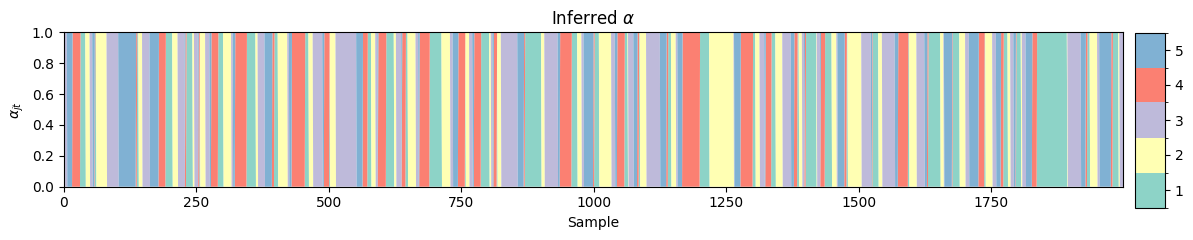

In [23]:
print("Dice coefficient (Alpha):", dice_alpha)
print("Dice coefficient (Beta):", dice_beta)
print("Dice coefficient (gamma):", dice_gamma)

plotting.plot_alpha(
    inf_stc_alpha,
    n_samples=2000,
    title="Ground truth " + r"$\alpha$",
    y_labels=r"$\alpha{jt}$",
)

plotting.plot_alpha(
    sim_stc_alpha,
    n_samples=2000,
    title="Inferred " + r"$\alpha$",
    y_labels=r"$\alpha_{jt}$",
)

plotting.plot_alpha(
    inf_stc_beta,
    n_samples=2000,
    title="Ground truth " + r"$\alpha$",
    y_labels=r"$\alpha{jt}$",
)

plotting.plot_alpha(
    sim_stc_beta,
    n_samples=2000,
    title="Inferred " + r"$\alpha$",
    y_labels=r"$\alpha_{jt}$",
)


plotting.plot_alpha(
    inf_stc_gamma,
    n_samples=2000,
    title="Ground truth " + r"$\alpha$",
    y_labels=r"$\alpha{jt}$",
)

plotting.plot_alpha(
    sim_stc_gamma,
    n_samples=2000,
    title="Inferred " + r"$\alpha$",
    y_labels=r"$\alpha_{jt}$",
)
# Rng = 15
# Dice coefficient (Alpha): 0.554140625
# Dice coefficient (Beta): 0.9953125
# Dice coefficient (gamma): 0.7173046875

# Rng = 42
# Dice coefficient (Alpha): 0.556328125
# Dice coefficient (Beta): 0.995546875
# Dice coefficient (gamma): 0.68625

# Rn = 63
# Dice coefficient (Alpha): 0.618125
# Dice coefficient (Beta): 0.997265625
# Dice coefficient (gamma): 0.5314453125

In [24]:
sim.means

array([[-0.11923675, -0.25936683,  0.00573097,  0.15402537, -0.29062982,
         0.22108419,  0.50488365, -0.05393299, -0.34358702, -0.12826525,
         0.12884046],
       [-0.02266978,  0.31056629, -0.31913039,  0.26422245, -0.02642205,
        -0.14591437, -0.05054052,  0.12552889, -0.1690452 ,  0.34014031,
        -0.18454675],
       [-0.0697767 ,  0.01932735,  0.32772729,  0.66769452,  0.05755019,
         0.51032037,  0.49121137, -0.04784831, -0.0334596 , -0.06430411,
         0.02088761],
       [-0.28442154,  0.05410999, -0.09267293,  0.26829433,  0.08820946,
         0.30962677,  0.49070831,  0.03352957, -0.08346528,  0.04104571,
        -0.15941663],
       [-0.1658629 ,  0.13336647,  0.22416195,  0.0067332 , -0.06389256,
        -0.16812437, -0.28026529, -0.14168373,  0.09328862, -0.02580741,
         0.05903844]])

In [25]:
def build_model_configs(n_states, n_channels, sequence_length=100, batch_size=8):
    """Builds and returns a dictionary of model configurations.
    
    Comments indicate the options not used.
    """
    #%% Define model configurations
    config_means = Config(
        n_states=n_states,
        n_channels=n_channels,
        sequence_length=sequence_length,
        learn_means=True,
        learn_covariances=False,
        diagonal_covariances=False,
        learn_trans_prob=True,
        batch_size=batch_size,
        learning_rate=0.01,
        n_epochs=20,
    )

    # config_corrs = Config(
    #     n_states=n_states,
    #     n_channels=n_channels,
    #     sequence_length=sequence_length,
    #     learn_means=False,
    #     learn_covariances=True,
    #     # diagonal_covariances=False,
    #     learn_trans_prob=True,
    #     batch_size=16,
    #     learning_rate=0.01,
    #     n_epochs=20,
    # )

    config_stds = Config(
        n_states=n_states,
        n_channels=n_channels,
        sequence_length=sequence_length,
        learn_means=False,
        learn_covariances=True,
        diagonal_covariances=True,
        learn_trans_prob=True,
        batch_size=batch_size,
        learning_rate=0.01,
        n_epochs=20,
    )

    # It currently isn't possible to learn hmm covariances without variances
    # # 1. Means & Corrs
    # config_means_corrs = Config(
    #     n_states=n_states,
    #     n_channels=n_channels,
    #     sequence_length=sequence_length,
    #     learn_means=True,
    #     learn_covariances=True,  # learn full covariance structure (i.e. correlations)
    #     diagonal_covariances=False,  # we don't restrict to diagonal => using full covariances
    #     learn_trans_prob=True,
    #     batch_size=batch_size,
    #     learning_rate=0.01,
    #     n_epochs=20,
    # )

    # 2. Means & Stds
    config_means_stds = Config(
        n_states=n_states,
        n_channels=n_channels,
        sequence_length=sequence_length,
        learn_means=True,
        learn_covariances=True,  # we want to learn covariances, but restrict to diagonal for stds
        diagonal_covariances=True,
        learn_trans_prob=True,
        batch_size=batch_size,
        learning_rate=0.01,
        n_epochs=20,
    )

    # 3. Stds & Corrs
    config_stds_corrs = Config(
        n_states=n_states,
        n_channels=n_channels,
        sequence_length=sequence_length,
        learn_means=False,
        learn_covariances=True,
        diagonal_covariances=False,  # we want to capture both correlations and then later combine with stds, so full covariances
        learn_trans_prob=True,
        batch_size=batch_size,
        learning_rate=0.01,
        n_epochs=20,
    )

    # 3. All
    config_all = Config(
        n_states=n_states,
        n_channels=n_channels,
        sequence_length=sequence_length,
        learn_means=True,
        learn_covariances=True,
        diagonal_covariances=False,  # we want to capture both correlations and then later combine with stds, so full covariances
        learn_trans_prob=True,
        batch_size=batch_size,
        learning_rate=0.01,
        n_epochs=20,
    )

    # Dictionary mapping model names to their configs
    model_configs = {
        'means': config_means,
        # 'corrs': config_corrs,         # not used
        'stds': config_stds,
        # 'means_corrs': config_means_corrs,  # not used
        'means&stds': config_means_stds,
        'stds&corrs': config_stds_corrs,
        'all': config_all,
    }

    return model_configs

In [ ]:
print("Importing packages")
import os
import random
import numpy as np
import pickle
import argparse
from osl_dynamics import data, simulation
from osl_dynamics.inference import metrics, modes
from osl_dynamics.models.hmm import Config, Model
from osl_dynamics.simulation import HMM_MVN, MDyn_HMM_MVN
from osl_dynamics.data import Data
from osl_dynamics.utils import plotting

# #%% Parse command line arguments
# parser = argparse.ArgumentParser()
# parser.add_argument("noise_level", type=float, help = 'How much to scale the noise?')
# parser.add_argument("repetition", type=int, help='Which repetition to run?')
# # parser.add_argument("trans_prob_diag", type=int, help = 'Prior on TPM') 
# # parser.add_argument("n_ICs", type=int, help = 'No. ICs of parcellation', choices = [25, 50])
# # parser.add_argument("model_mean", type=int, help = 'Model mean for HMM states?', choices = [0, 1])

# args = parser.parse_args()
# noise_level = round(args.noise_level, 2)
# repetition = args.repetition

repetition = 1
noise_level_vec = [0.1, 1]
dice_list = list()

def build_model_configs(n_states, n_channels, sequence_length=100, batch_size=8):
    """Builds and returns a dictionary of model configurations.
    
    Comments indicate the options not used.
    """
    #%% Define model configurations
    config_means = Config(
        n_states=n_states,
        n_channels=n_channels,
        sequence_length=sequence_length,
        learn_means=True,
        learn_covariances=False,
        diagonal_covariances=False,
        learn_trans_prob=True,
        batch_size=batch_size,
        learning_rate=0.01,
        n_epochs=20,
    )

    # config_corrs = Config(
    #     n_states=n_states,
    #     n_channels=n_channels,
    #     sequence_length=sequence_length,
    #     learn_means=False,
    #     learn_covariances=True,
    #     # diagonal_covariances=False,
    #     learn_trans_prob=True,
    #     batch_size=16,
    #     learning_rate=0.01,
    #     n_epochs=20,
    # )

    config_stds = Config(
        n_states=n_states,
        n_channels=n_channels,
        sequence_length=sequence_length,
        learn_means=False,
        learn_covariances=True,
        diagonal_covariances=True,
        learn_trans_prob=True,
        batch_size=batch_size,
        learning_rate=0.01,
        n_epochs=20,
    )

    # It currently isn't possible to learn hmm covariances without variances
    # # 1. Means & Corrs
    # config_means_corrs = Config(
    #     n_states=n_states,
    #     n_channels=n_channels,
    #     sequence_length=sequence_length,
    #     learn_means=True,
    #     learn_covariances=True,  # learn full covariance structure (i.e. correlations)
    #     diagonal_covariances=False,  # we don't restrict to diagonal => using full covariances
    #     learn_trans_prob=True,
    #     batch_size=batch_size,
    #     learning_rate=0.01,
    #     n_epochs=20,
    # )

    # 2. Means & Stds
    config_means_stds = Config(
        n_states=n_states,
        n_channels=n_channels,
        sequence_length=sequence_length,
        learn_means=True,
        learn_covariances=True,  # we want to learn covariances, but restrict to diagonal for stds
        diagonal_covariances=True,
        learn_trans_prob=True,
        batch_size=batch_size,
        learning_rate=0.01,
        n_epochs=20,
    )

    # 3. Stds & Corrs
    config_stds_corrs = Config(
        n_states=n_states,
        n_channels=n_channels,
        sequence_length=sequence_length,
        learn_means=False,
        learn_covariances=True,
        diagonal_covariances=False,  # we want to capture both correlations and then later combine with stds, so full covariances
        learn_trans_prob=True,
        batch_size=batch_size,
        learning_rate=0.01,
        n_epochs=20,
    )

    # 3. All
    config_all = Config(
        n_states=n_states,
        n_channels=n_channels,
        sequence_length=sequence_length,
        learn_means=True,
        learn_covariances=True,
        diagonal_covariances=False,  # we want to capture both correlations and then later combine with stds, so full covariances
        learn_trans_prob=True,
        batch_size=batch_size,
        learning_rate=0.01,
        n_epochs=20,
    )

    # Dictionary mapping model names to their configs
    model_configs = {
        'means': config_means,
        # 'corrs': config_corrs,         # not used
        'stds': config_stds,
        # # 'means_corrs': config_means_corrs,  # not used
        # 'means&stds': config_means_stds,
        'stds&corrs': config_stds_corrs,
        # 'all': config_all,
    }

    return model_configs

for noise_level in noise_level_vec:


    # Set random seed for reproducibility
    random.seed(repetition)

    # Create directory for results
    results_dir = "/gpfs3/well/win-fmrib-analysis/users/psz102/git_repos/osl-dynamics/examples/simulation/results_hmm_variants/"
    os.makedirs(results_dir, exist_ok=True)

    #%% Simulate data
    n_states = 5
    n_channels = 11
    n_samples = 25600

    print("Simulating data")
    sim = MDyn_HMM_MVN(
        n_samples=n_samples,
        n_states=n_states,
        n_modes=n_states,
        n_channels=n_channels,
        trans_prob="sequence",
        stay_prob=0.9,
        means="random",
        covariances="random",
        observation_error=noise_level
    )

    # Retrieve simulated ground truth state time courses
    sim_alpha_stc, sim_beta_stc, sim_gamma_stc = sim.mode_time_course
    # sim_alpha_stc = sim.mode_time_course

    # Retrieve simulated time series for each variant
    sim_all_time_series         = sim.time_series
    sim_means_time_series       = sim.time_series_means
    sim_corrs_time_series       = sim.time_series_corrs
    sim_stds_time_series        = sim.time_series_stds
    sim_means_corrs_time_series = sim.time_series_means_corrs
    sim_means_stds_time_series  = sim.time_series_means_stds
    sim_stds_corrs_time_series  = sim.time_series_stds_corrs


    # Create Data objects for training for each variant
    data_all          = data.Data(sim_all_time_series)  
    data_means        = data.Data(sim_means_time_series)
    data_corrs        = data.Data(sim_corrs_time_series)
    data_stds         = data.Data(sim_stds_time_series)
    data_means_corrs  = data.Data(sim_means_corrs_time_series)
    data_means_stds   = data.Data(sim_means_stds_time_series)
    data_stds_corrs   = data.Data(sim_stds_corrs_time_series)


    means = sim.means
    corrs = sim.corrs
    stds = sim.stds

    # Build model configurations dictionary
    model_configs = build_model_configs(n_states, n_channels)

    # Dictionary mapping dataset names to Data objects
    data_dict = {
        # 'all' : data_all,
        'means': data_means,
        'corrs': data_corrs,
        'stds': data_stds,
        # 'means&corrs': data_means_corrs,
        # 'means&stds': data_means_stds,
        # 'stds&corrs': data_stds_corrs,
    }

    # Dictionary mapping dataset names to ground truth state time courses
    sim_stcs = {
        # 'all' : sim_alpha_stc,
        'means': sim_alpha_stc,
        'corrs': sim_alpha_stc,
        'stds': sim_alpha_stc,
        # 'means&corrs': sim_alpha_stc,
        # 'means&stds': sim_alpha_stc,
        # 'stds&corrs': sim_alpha_stc,
    }

    #%% Run models on all datasets and store results
    results = {}  # Structure: results[model_name][data_name] = {free_energy, dice, inf_stc, sim_stc}

    # Loop over model types
    for model_name, config in model_configs.items():
        results[model_name] = {}
        # Loop over dataset types
        for data_name, d in data_dict.items():
            print(f"\nRunning model '{model_name}' on dataset '{data_name}'")
            # Create a new model instance for this combination
            model = Model(config)
            
            # Standardize data (if not already done)
            d.prepare({"standardize": {}})
            
            # Initialization (adjust n_init/n_epochs as needed)
            init_history = model.random_state_time_course_initialization(d, n_init=5, n_epochs=1)
            
            # Full training
            history = model.fit(d)
            
            # Calculate free energy
            free_energy = model.free_energy(d)
            
            # Get inferred state probabilities and compute Viterbi path
            alp = model.get_alpha(d)
            inf_means, inf_corrs = model.get_means_covariances()
            # inf_means, inf_stds, inf_corrs = model.get_means_stds_corrs()
            inf_stc = modes.argmax_time_courses(alp)
            
            # Re-order the inferred state time course to match the ground truth
            inf_stc, sim_stc = modes.match_modes(inf_stc, sim_stcs[data_name])
            
            # Calculate dice coefficient comparing inferred vs. simulated state time courses
            dice = metrics.dice_coefficient(inf_stc, sim_stc)

            dice_list.append(dice)
            
            # Save the results for this run
            results[model_name][data_name] = {
                'free_energy': free_energy,
                'dice': dice,
                'means': inf_means,
                'corrs': inf_corrs,
                # 'stds': inf_stds,
                'inf_stc': inf_stc,
                'sim_stc': sim_stc
            }
            
            print(f"Free energy: {free_energy}")
            print(f"Dice coefficient: {dice}")

    #         # Save individual run results to a file
    #         combination_file = os.path.join(results_dir, f"results_{model_name}_{data_name}_rep_{repetition}.pkl")
    #         with open(combination_file, "wb") as f:
    #             pickle.dump(results[model_name][data_name], f)
    #         print(f"Saved results for model '{model_name}' on dataset '{data_name}' to {combination_file}")

    # # Print summary of all runs
    # print("\nSummary of all runs:")
    # for m_name, runs in results.items():
    #     for d_name, res in runs.items():
    #         print(f"Model '{m_name}' on dataset '{d_name}': Free energy = {res['free_energy']}, Dice = {res['dice']}")


    # # Save the results object to a file in the results directory
    # results_file = os.path.join(results_dir, f"results_all_rep_{repetition}.pkl")
    # with open(results_file, "wb") as f:
    #     pickle.dump(results, f)
        
    # print(f"Results saved to {results_file}")

Importing packages
Simulating data


Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]

Loading files:   0%|          | 0/1 [00:00<?, ?it/s]


Running model 'means' on dataset 'means'


Standardize:   0%|          | 0/1 [00:00<?, ?it/s]

2025-03-13 10:11:21 INFO osl-dynamics [hmm.py:485:random_state_time_course_initialization]: Random state time course initialization
2025-03-13 10:11:21 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 0
2025-03-13 10:11:21 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 9s 216ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.5848


2025-03-13 10:11:31 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 1
2025-03-13 10:11:31 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 11s 191ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.5682


2025-03-13 10:11:42 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 2
2025-03-13 10:11:42 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 9s 207ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.5845


2025-03-13 10:11:51 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 3
2025-03-13 10:11:51 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 9s 205ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.5885


2025-03-13 10:12:00 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 4
2025-03-13 10:12:00 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 9s 213ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.5786


2025-03-13 10:12:10 INFO osl-dynamics [hmm.py:522:random_state_time_course_initialization]: Using initialization 1


Epoch 1/20
32/32 [==============================] - 11s 359ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.5152
Epoch 2/20
32/32 [==============================] - 13s 405ms/step - rho: 0.1866 - lr: 0.0090 - loss: 15.4692
Epoch 3/20
32/32 [==============================] - 8s 250ms/step - rho: 0.1436 - lr: 0.0082 - loss: 15.4636
Epoch 4/20
32/32 [==============================] - 7s 231ms/step - rho: 0.1187 - lr: 0.0074 - loss: 15.4598
Epoch 5/20
32/32 [==============================] - 6s 192ms/step - rho: 0.1022 - lr: 0.0067 - loss: 15.4606
Epoch 6/20
32/32 [==============================] - 6s 190ms/step - rho: 0.0904 - lr: 0.0061 - loss: 15.4589
Epoch 7/20
32/32 [==============================] - 6s 182ms/step - rho: 0.0814 - lr: 0.0055 - loss: 15.4568
Epoch 8/20
32/32 [==============================] - 5s 167ms/step - rho: 0.0743 - lr: 0.0050 - loss: 15.4579
Epoch 9/20
32/32 [==============================] - 6s 176ms/step - rho: 0.0686 - lr: 0.0045 - loss: 15.4563
Epoch 10/20
32/32

2025-03-13 10:14:26 INFO osl-dynamics [hmm.py:1118:free_energy]: Getting free energy
2025-03-13 10:14:31 INFO osl-dynamics [hmm.py:1311:get_alpha]: Getting alpha


Free energy: 15.560585496232942
Dice coefficient: 0.682109375

Running model 'means' on dataset 'corrs'


Standardize:   0%|          | 0/1 [00:00<?, ?it/s]

2025-03-13 10:14:34 INFO osl-dynamics [hmm.py:485:random_state_time_course_initialization]: Random state time course initialization
2025-03-13 10:14:34 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 0
2025-03-13 10:14:34 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 9s 201ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.5709


2025-03-13 10:14:44 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 1
2025-03-13 10:14:44 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 9s 202ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.5650


2025-03-13 10:14:53 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 2
2025-03-13 10:14:53 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 9s 202ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.5919


2025-03-13 10:15:02 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 3
2025-03-13 10:15:02 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 9s 198ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.5880


2025-03-13 10:15:11 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 4
2025-03-13 10:15:11 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 9s 195ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.5828


2025-03-13 10:15:20 INFO osl-dynamics [hmm.py:522:random_state_time_course_initialization]: Using initialization 1


Epoch 1/20
32/32 [==============================] - 6s 183ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.2720
Epoch 2/20
32/32 [==============================] - 6s 182ms/step - rho: 0.1866 - lr: 0.0090 - loss: 14.9269
Epoch 3/20
32/32 [==============================] - 6s 196ms/step - rho: 0.1436 - lr: 0.0082 - loss: 14.8638
Epoch 4/20
32/32 [==============================] - 6s 188ms/step - rho: 0.1187 - lr: 0.0074 - loss: 14.8485
Epoch 5/20
32/32 [==============================] - 6s 187ms/step - rho: 0.1022 - lr: 0.0067 - loss: 14.8479
Epoch 6/20
32/32 [==============================] - 6s 180ms/step - rho: 0.0904 - lr: 0.0061 - loss: 14.8400
Epoch 7/20
32/32 [==============================] - 6s 182ms/step - rho: 0.0814 - lr: 0.0055 - loss: 14.8424
Epoch 8/20
32/32 [==============================] - 8s 239ms/step - rho: 0.0743 - lr: 0.0050 - loss: 14.8383
Epoch 9/20
32/32 [==============================] - 6s 201ms/step - rho: 0.0686 - lr: 0.0045 - loss: 14.8393
Epoch 10/20
32/32 [

2025-03-13 10:17:24 INFO osl-dynamics [hmm.py:1118:free_energy]: Getting free energy
2025-03-13 10:17:28 INFO osl-dynamics [hmm.py:1311:get_alpha]: Getting alpha


Free energy: 15.390922750820451
Dice coefficient: 0.3238671875

Running model 'means' on dataset 'stds'


Standardize:   0%|          | 0/1 [00:00<?, ?it/s]

2025-03-13 10:17:32 INFO osl-dynamics [hmm.py:485:random_state_time_course_initialization]: Random state time course initialization
2025-03-13 10:17:32 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 0
2025-03-13 10:17:32 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 8s 191ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.6085


2025-03-13 10:17:40 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 1
2025-03-13 10:17:40 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 8s 176ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.6090


2025-03-13 10:17:48 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 2
2025-03-13 10:17:48 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 8s 184ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.6083


2025-03-13 10:17:57 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 3
2025-03-13 10:17:57 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 8s 194ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.6087


2025-03-13 10:18:05 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 4
2025-03-13 10:18:05 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 10s 179ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.6091


2025-03-13 10:18:15 INFO osl-dynamics [hmm.py:522:random_state_time_course_initialization]: Using initialization 2


Epoch 1/20
32/32 [==============================] - 5s 166ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.6080
Epoch 2/20
32/32 [==============================] - 6s 173ms/step - rho: 0.1866 - lr: 0.0090 - loss: 15.6068
Epoch 3/20
32/32 [==============================] - 6s 174ms/step - rho: 0.1436 - lr: 0.0082 - loss: 15.6048
Epoch 4/20
32/32 [==============================] - 6s 188ms/step - rho: 0.1187 - lr: 0.0074 - loss: 15.6036
Epoch 5/20
32/32 [==============================] - 6s 188ms/step - rho: 0.1022 - lr: 0.0067 - loss: 15.6022
Epoch 6/20
32/32 [==============================] - 6s 179ms/step - rho: 0.0904 - lr: 0.0061 - loss: 15.6019
Epoch 7/20
32/32 [==============================] - 6s 172ms/step - rho: 0.0814 - lr: 0.0055 - loss: 15.6005
Epoch 8/20
32/32 [==============================] - 6s 178ms/step - rho: 0.0743 - lr: 0.0050 - loss: 15.6003
Epoch 9/20
32/32 [==============================] - 6s 176ms/step - rho: 0.0686 - lr: 0.0045 - loss: 15.5997
Epoch 10/20
32/32 [

2025-03-13 10:20:07 INFO osl-dynamics [hmm.py:1118:free_energy]: Getting free energy
2025-03-13 10:20:11 INFO osl-dynamics [hmm.py:1311:get_alpha]: Getting alpha


Free energy: 15.60795939816336
Dice coefficient: 0.2233984375

Running model 'stds' on dataset 'means'


Standardize:   0%|          | 0/1 [00:00<?, ?it/s]

2025-03-13 10:20:15 INFO osl-dynamics [hmm.py:485:random_state_time_course_initialization]: Random state time course initialization
2025-03-13 10:20:15 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 0
2025-03-13 10:20:15 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 8s 157ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.6081


2025-03-13 10:20:23 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 1
2025-03-13 10:20:23 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 9s 157ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.6079


2025-03-13 10:20:31 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 2
2025-03-13 10:20:31 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1
32/32 [==============================] - 7s 161ms/step - rho: 0.2853 - lr: 0.0100 - loss: 15.6083


2025-03-13 10:20:39 INFO osl-dynamics [hmm.py:501:random_state_time_course_initialization]: Initialization 3
2025-03-13 10:20:39 INFO osl-dynamics [hmm.py:1008:set_random_state_time_course_initialization]: Setting random means and covariances


Epoch 1/1


/gpfs3/well/win-fmrib-analysis/users/psz102/git_repos/osl-dynamics/osl_dynamics/utils/plotting.py:1768: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_1081074/2886176156.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


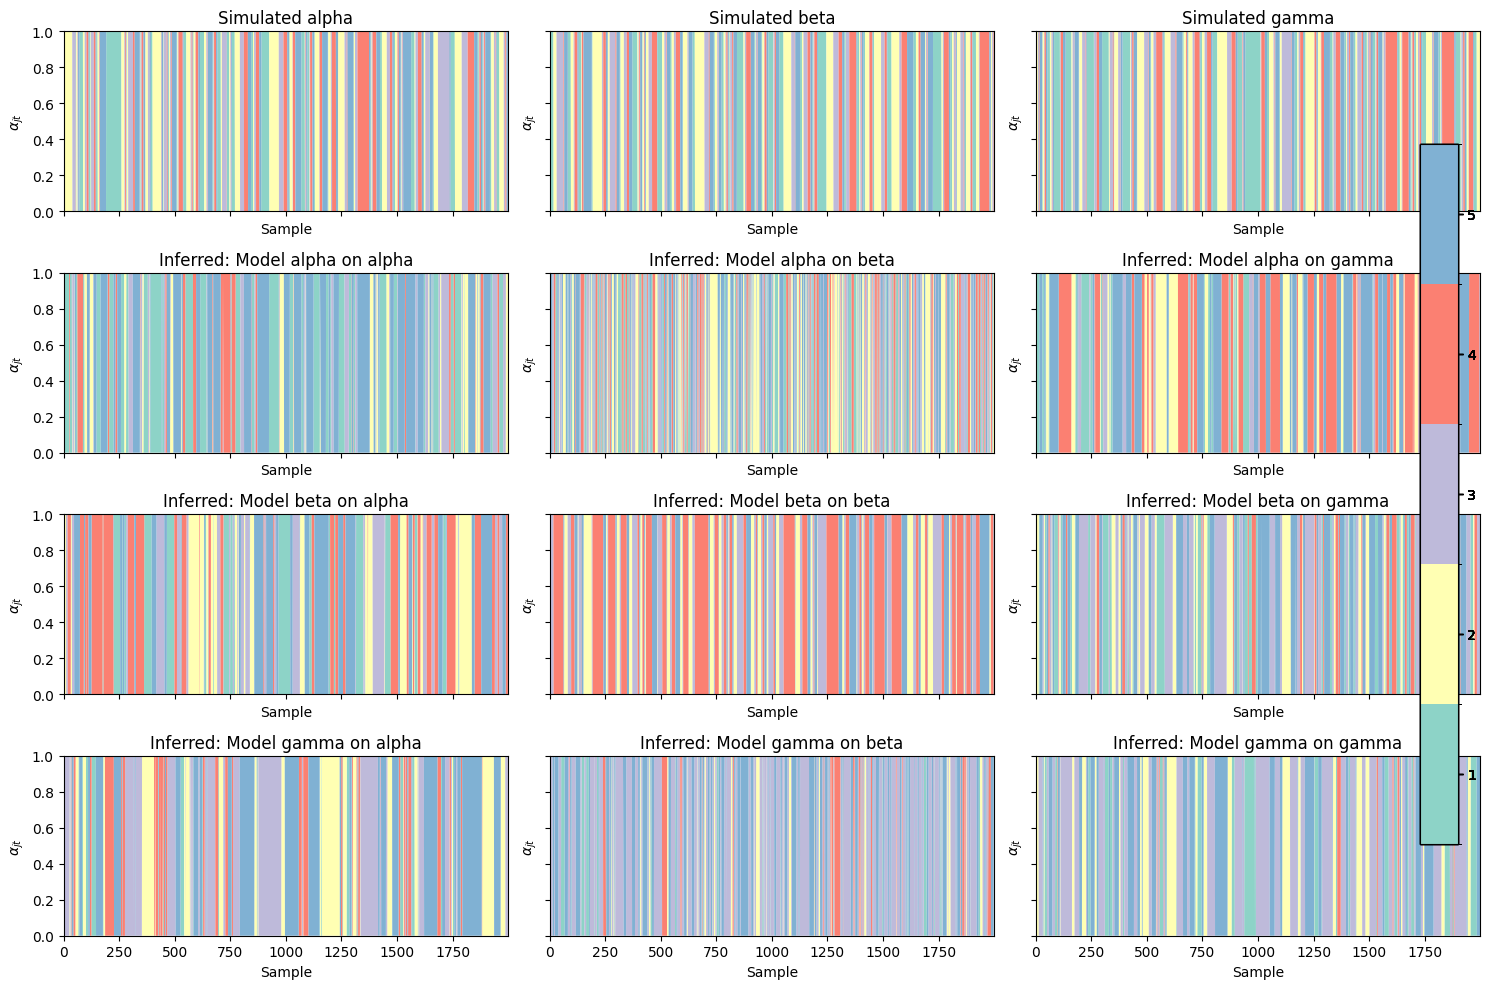

In [ ]:
import matplotlib.pyplot as plt
from osl_dynamics.utils import plotting  # or however you import your plotting module

# Define the keys for your simulated and inferred state time courses
# data_names = ['alpha', 'beta', 'gamma']
# model_names = ['alpha', 'beta', 'gamma']
data_names = ['means', 'corrs', 'stds']
model_names = ['means', 'corrs', 'stds']

# Create a grid with 4 rows and 3 columns
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 10), sharex=True, sharey=True)

# Row 0: Plot simulated ground truth state time courses
for j, d_name in enumerate(data_names):
    ax = axs[0, j]
    plotting.plot_alpha(
        sim_stcs[d_name],       # simulated state time course for this dataset
        n_samples=2000,
        title=f"Simulated {d_name}",
        y_labels=r"$\alpha_{jt}$",
        axes=[ax]
    )

# Row 1: Plot inferred state time courses from model 'alpha'
for j, d_name in enumerate(data_names):
    ax = axs[1, j]
    plotting.plot_alpha(
        results['alpha'][d_name]['inf_stc'],  # inferred stc from model alpha on dataset d_name
        n_samples=2000,
        title=f"Inferred: Model alpha on {d_name}",
        y_labels=r"$\alpha_{jt}$",
        axes=[ax]
    )

# Row 2: Plot inferred state time courses from model 'beta'
for j, d_name in enumerate(data_names):
    ax = axs[2, j]
    plotting.plot_alpha(
        results['beta'][d_name]['inf_stc'],  # inferred stc from model beta on dataset d_name
        n_samples=2000,
        title=f"Inferred: Model beta on {d_name}",
        y_labels=r"$\alpha_{jt}$",
        axes=[ax]
    )

# Row 3: Plot inferred state time courses from model 'gamma'
for j, d_name in enumerate(data_names):
    ax = axs[3, j]
    plotting.plot_alpha(
        results['gamma'][d_name]['inf_stc'],  # inferred stc from model gamma on dataset d_name
        n_samples=2000,
        title=f"Inferred: Model gamma on {d_name}",
        y_labels=r"$\alpha_{jt}$",
        axes=[ax]
    )

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume results is already defined from the analysis code, and keys are:
# model_names = ['alpha', 'beta', 'gamma'] and data_names = ['alpha', 'beta', 'gamma']
# model_names = ['alpha', 'beta', 'gamma']
# data_names = ['alpha', 'beta', 'gamma']
data_names = ['means', 'corrs', 'stds']
model_names = ['means', 'corrs', 'stds']

# Create a DataFrame with rows = simulated dataset type, columns = model type
dice_grid = pd.DataFrame({
    m_name: [results[m_name][d_name]['dice'] for d_name in data_names]
    for m_name in model_names
}, index=data_names)

print("Grid of Dice Coefficients (rows: simulated data, columns: model):")
print(dice_grid)

#%% Plot a grouped bar chart of the dice coefficients
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.2
x = np.arange(len(data_names))  # one tick per simulated dataset type

# Loop over each model to create its bars
for i, m_name in enumerate(model_names):
    dice_values = [results[m_name][d_name]['dice'] for d_name in data_names]
    ax.bar(x + i * bar_width, dice_values, width=bar_width, label=f"Model {m_name}")

# Set x-axis ticks and labels
ax.set_xticks(x + bar_width)
ax.set_xticklabels(data_names)
ax.set_ylabel("Dice Coefficient")
ax.set_title("Dice Coefficients for 9 Model-Dataset Runs")
ax.legend()

plt.tight_layout()
plt.show()


NameError: name 'results' is not defined

/tmp/ipykernel_1081074/1053893291.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


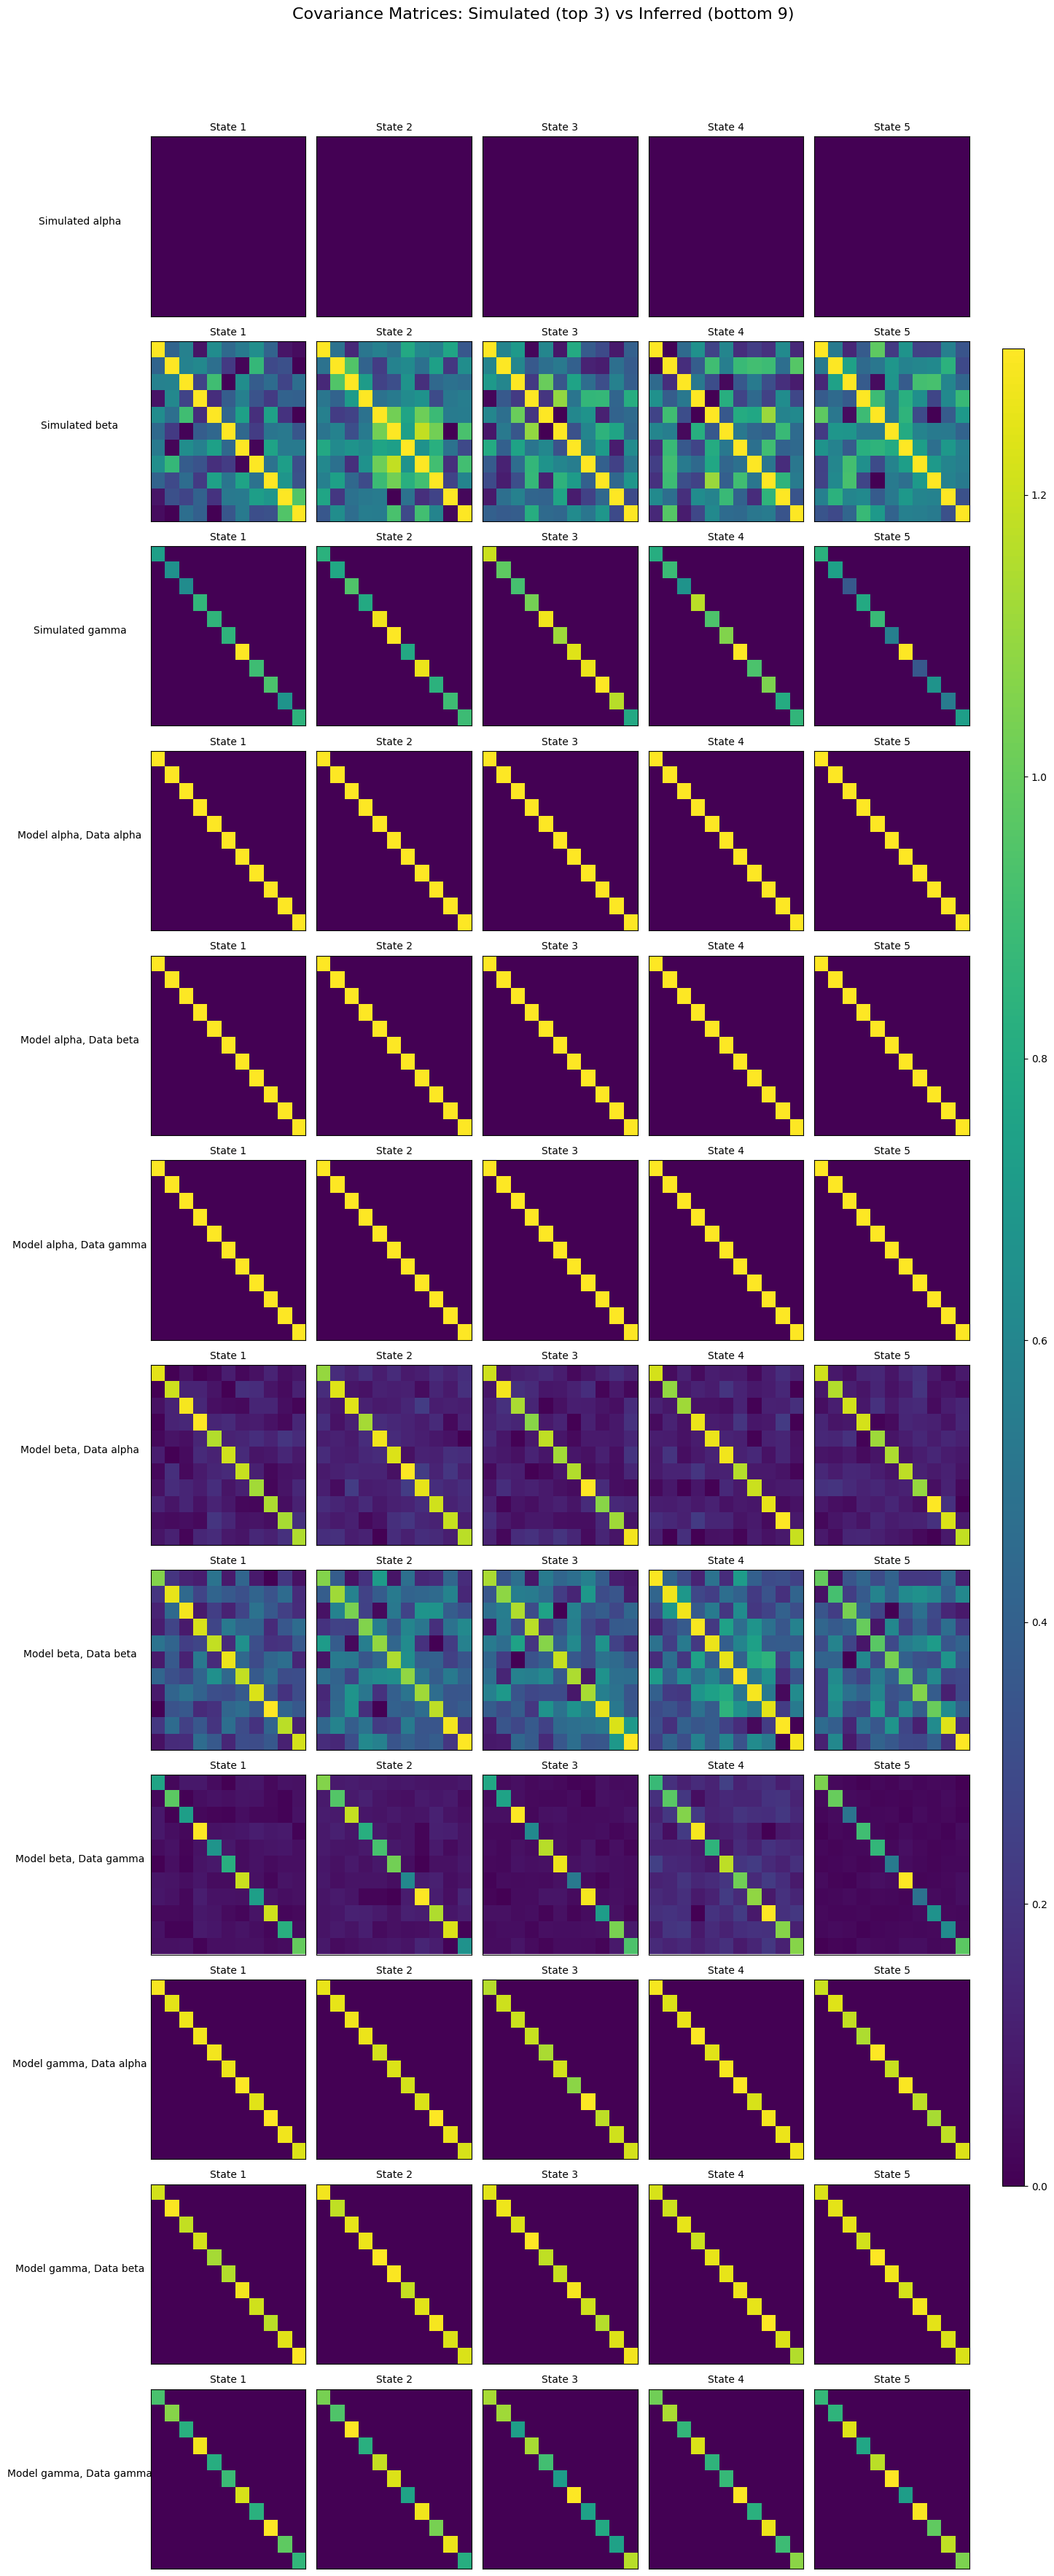

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function to convert a state_params dictionary into an array of covariance matrices.
def dict_to_array_covs(state_params, n_states=5):
    covs = []
    for state in range(n_states):
        covs.append(state_params[state]['sigma'])
    return np.array(covs)  # shape: [n_states, n_channels, n_channels]

# --- Prepare simulated covariance matrices ---
sim_run_labels = []
sim_covs_list = []

# These variables should be assigned earlier:
#   state_params_alpha = sim.state_params_alpha
#   state_params_beta  = sim.state_params_beta
#   state_params_gamma = sim.state_params_gamma

sim_run_labels.append("Simulated alpha")
sim_covs_list.append(np.zeros_like(corrs))
sim_run_labels.append("Simulated beta")
sim_covs_list.append(corrs)
sim_run_labels.append("Simulated gamma")
std_array =  np.zeros_like(corrs)
for j in range(5):
    np.fill_diagonal(std_array[j], stds[j])
sim_covs_list.append(std_array)

# --- Prepare inferred covariance matrices (from the 9 runs) ---
inference_run_labels = []
inference_covs_list = []

# We assume that your results dictionary has, for each run, an entry 'covs'
# with shape [5, 11, 11].
for model_name in model_configs.keys():
    for data_name in data_dict.keys():
        run_label = f"Model {model_name}, Data {data_name}"
        covs = results[model_name][data_name]['covs']
        inference_run_labels.append(run_label)
        inference_covs_list.append(covs)

# Combine simulation and inference runs
all_run_labels = sim_run_labels + inference_run_labels  # total should be 3 + 9 = 12 runs
all_covs_list = sim_covs_list + inference_covs_list

n_runs = len(all_covs_list)  # should be 12
n_states = 5  # number of states, hence 5 covariance matrices per run

# Create a grid: 12 rows, 5 columns
fig, axs = plt.subplots(nrows=n_runs, ncols=n_states, figsize=(15, 3 * n_runs))

# Loop over each run (each row) and plot each state's covariance matrix
for i, (label, cov_matrices) in enumerate(zip(all_run_labels, all_covs_list)):
    for j in range(n_states):
        ax = axs[i, j]
        # Plot the j-th covariance matrix (11x11)
        im = ax.imshow(cov_matrices[j], cmap="viridis", aspect="auto")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"State {j+1}", fontsize=10)
    # Label the leftmost subplot of each row with the run label
    axs[i, 0].set_ylabel(label, rotation=0, labelpad=70, fontsize=10)

# Add a common colorbar for the entire figure
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.suptitle("Covariance Matrices: Simulated (top 3) vs Inferred (bottom 9)", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


In [17]:
import numpy as np

def dict_to_array_means(state_params, n_states=5):
    """Convert a state_params dictionary into a 2D array of means.
    
    Parameters
    ----------
    state_params : dict
        Dictionary where each key is a state index (0, 1, …, n_states-1) 
        and each value is a dictionary with a key 'mu' for the mean vector.
    n_states : int, optional
        Number of states. Default is 5.
    
    Returns
    -------
    means_array : np.ndarray
        Array of shape (n_states, n_channels) containing the mean vectors.
    """
    means = []
    for state in range(n_states):
        means.append(state_params[state]['mu'])
    return np.array(means)


/tmp/ipykernel_1081074/222568829.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.88, 0.95])


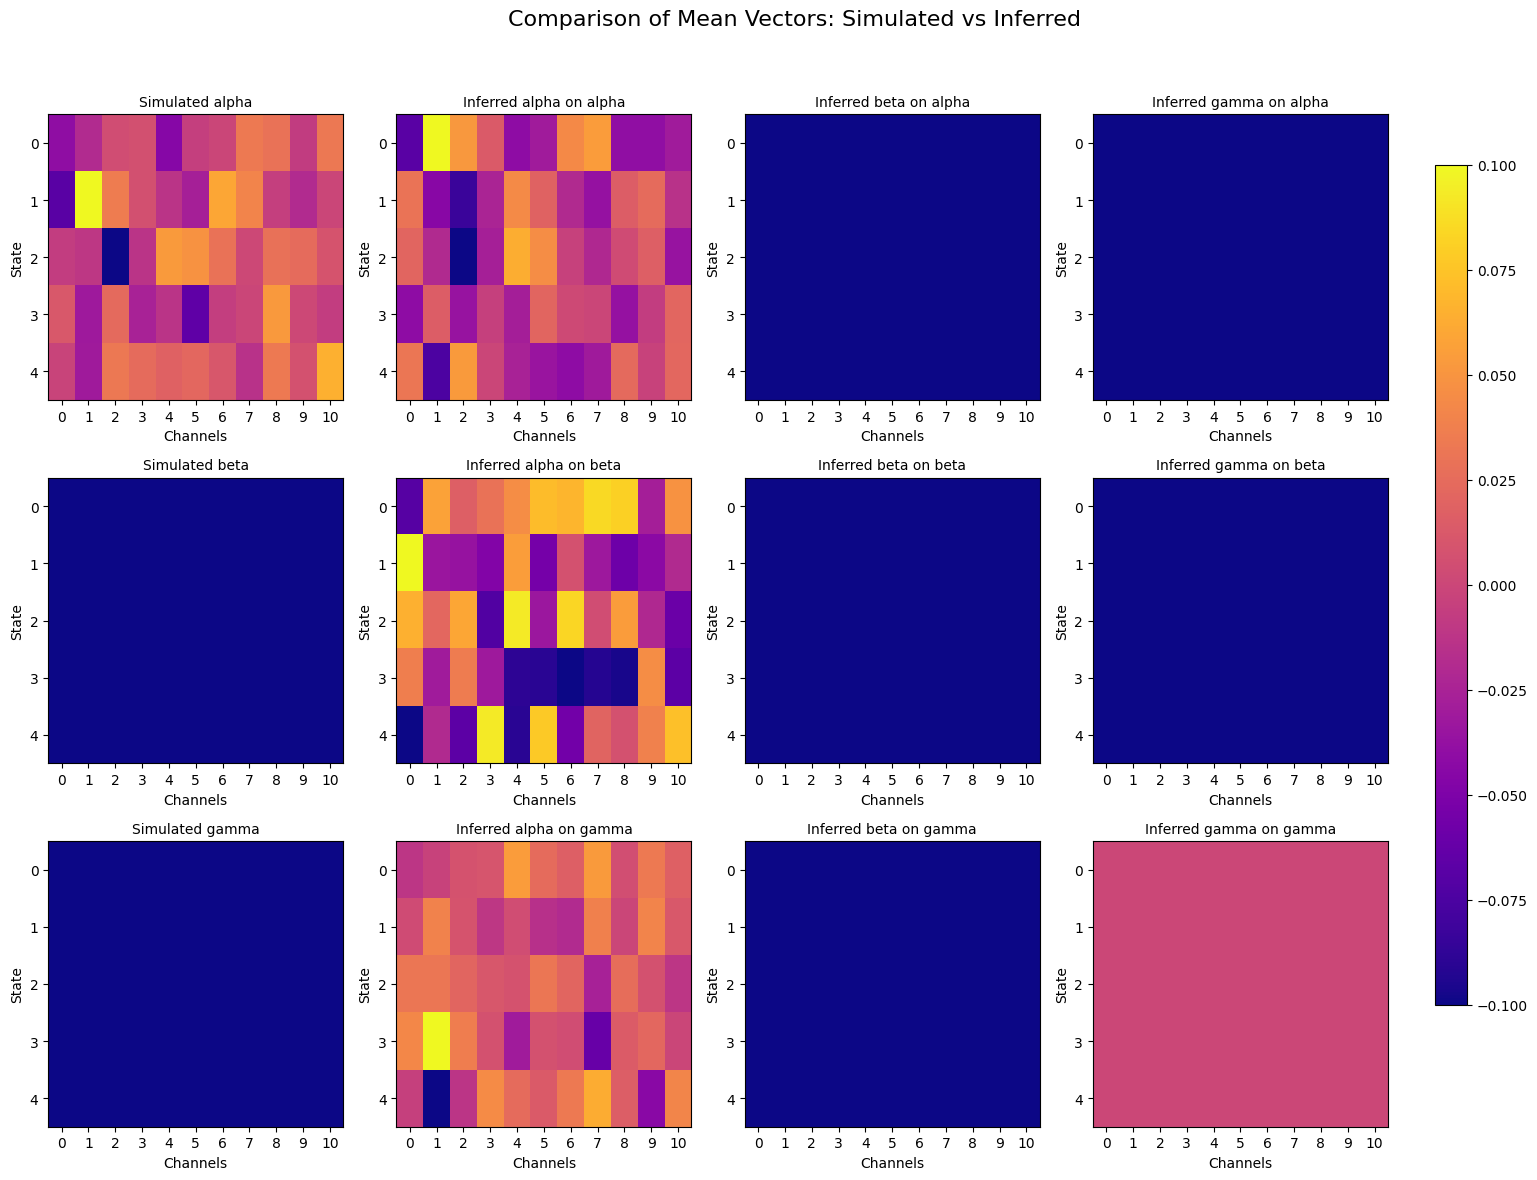

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Define the datasets and model names (order matters)
datasets = ['alpha', 'beta', 'gamma']
models = ['alpha', 'beta', 'gamma']

# Prepare a dictionary for simulated means per dataset:
# For alpha, use the actual simulated means.
sim_means['alpha'] =sim.means  # shape (5, 11)
# For beta and gamma, use a zeros array with the same shape.
sim_means['beta']  = np.zeros_like(means)
sim_means['gamma'] = np.zeros_like(means)

# Prepare a dictionary for inferred means:
# inferred_means[dataset][model] = array of shape (5, 11)
inferred_means = {}
for dataset in datasets:
    inferred_means[dataset] = {}
    for model in models:
        inferred_means[dataset][model] = results[model][dataset]['means']

# Create a grid: 3 rows (one per dataset) x 4 columns (1 simulated + 3 inferred)
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))

for i, dataset in enumerate(datasets):
    # Column 0: Simulated means for this dataset
    ax = axs[i, 0]
    im = ax.imshow(sim_means[dataset], cmap="plasma", aspect="auto")
    ax.set_title(f"Simulated {dataset}", fontsize=10)
    ax.set_xlabel("Channels")
    ax.set_ylabel("State")
    ax.set_xticks(range(sim_means[dataset].shape[1]))
    ax.set_yticks(range(sim_means[dataset].shape[0]))
    
    # Columns 1-3: Inferred means for each model for this dataset
    for j, model in enumerate(models):
        ax = axs[i, j+1]
        im = ax.imshow(inferred_means[dataset][model], cmap="plasma", aspect="auto")
        ax.set_title(f"Inferred {model} on {dataset}", fontsize=10)
        ax.set_xlabel("Channels")
        ax.set_ylabel("State")
        ax.set_xticks(range(inferred_means[dataset][model].shape[1]))
        ax.set_yticks(range(inferred_means[dataset][model].shape[0]))

# Add a single common colorbar for all subplots
fig.subplots_adjust(right=0.88)
cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.suptitle("Comparison of Mean Vectors: Simulated vs Inferred", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.88, 0.95])
plt.show()


In [53]:
means

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [46]:
corrs[0]

array([[ 1.00000000e+00, -1.82077866e-02,  1.58359195e-01,
        -4.18239853e-01,  2.30906908e-01,  1.08932596e-02,
         1.10390499e-01,  2.41185102e-01, -2.48751802e-02,
        -4.12776394e-01, -4.49601645e-01],
       [-1.82077866e-02,  1.00000000e+00,  1.67150671e-01,
         1.99468940e-01,  4.65590895e-02, -2.43184459e-01,
        -4.76632482e-01,  4.98067775e-01, -1.67032418e-01,
        -1.33647216e-01, -4.88987124e-01],
       [ 1.58359195e-01,  1.67150671e-01,  1.00000000e+00,
        -1.96130470e-01,  5.40681960e-01, -4.86104919e-01,
         2.36515412e-01, -6.55395981e-02,  3.01437745e-02,
        -1.94905302e-01,  4.31245558e-02],
       [-4.18239853e-01,  1.99468940e-01, -1.96130470e-01,
         1.00000000e+00, -3.03015665e-01, -5.54766642e-02,
         1.54995368e-01, -1.16618836e-01, -2.43575626e-01,
        -2.66888801e-02, -3.97326033e-02],
       [ 2.30906908e-01,  4.65590895e-02,  5.40681960e-01,
        -3.03015665e-01,  1.00000000e+00,  2.81569777e-04,
  

Dice Coefficient Matrix:
[[0.98480469 0.80652344 0.29980469 0.22898437 0.31816406 0.98222656
  0.27050781]
 [0.92488281 0.24535156 0.20746094 0.92296875 0.20246094 0.92242187
  0.62347656]
 [0.99457031 0.80292969 0.23121094 0.92335937 0.30835937 0.99335938
  0.43878906]
 [0.9990625  0.23324219 0.9996875  0.92105469 0.9984375  0.96011719
  0.99960938]
 [1.         0.7915625  0.99964844 0.92148438 0.99957031 0.99320312
  0.99957031]]


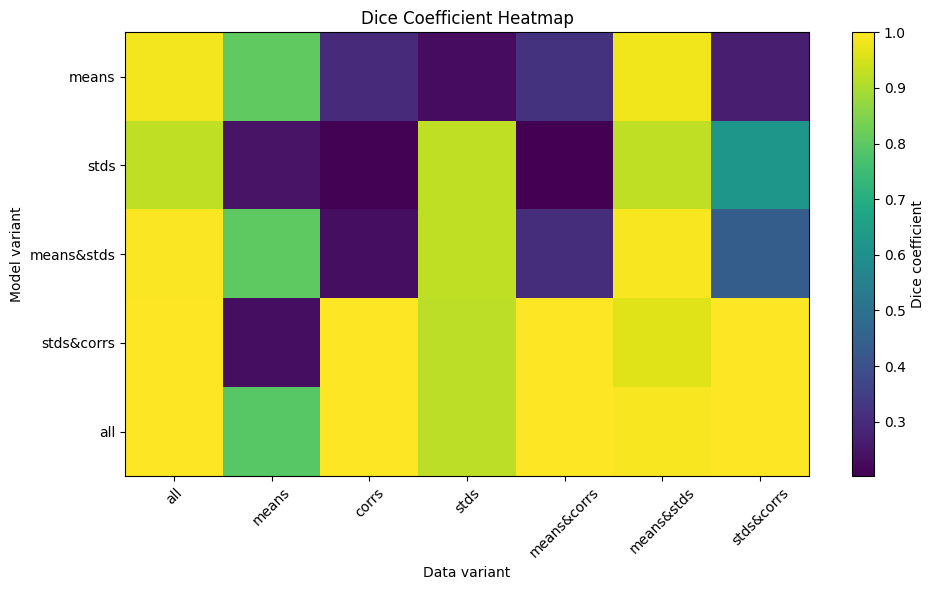

In [2]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Directory where individual result files were saved
results_dir = "/gpfs3/well/win-fmrib-analysis/users/psz102/git_repos/osl-dynamics/examples/simulation/results_hmm_variants/"

# Define the model variants and data variants as used in your saving process
model_names = ['means', 'stds', 'means&stds', 'stds&corrs', 'all']
data_names = ['all', 'means', 'corrs', 'stds', 'means&corrs', 'means&stds', 'stds&corrs']

# Initialize a matrix to store the Dice coefficients.
dice_matrix = np.empty((len(model_names), len(data_names)))
dice_matrix[:] = np.nan  # Fill with NaNs for any missing file

# Loop over each model and data variant combination
for i, model in enumerate(model_names):
    for j, data_variant in enumerate(data_names):
        filename = os.path.join(results_dir, f"results_{model}_{data_variant}.pkl")
        if os.path.exists(filename):
            with open(filename, "rb") as f:
                res = pickle.load(f)
            dice = res.get('dice', np.nan)
        else:
            print(f"File not found: {filename}")
            dice = np.nan
        dice_matrix[i, j] = dice

# Print the Dice matrix for inspection
print("Dice Coefficient Matrix:")
print(dice_matrix)

# Plot heatmap of Dice coefficients
plt.figure(figsize=(10, 6))
im = plt.imshow(dice_matrix, cmap="viridis", aspect="auto")
plt.colorbar(im, label="Dice coefficient")
plt.xticks(np.arange(len(data_names)), data_names, rotation=45)
plt.yticks(np.arange(len(model_names)), model_names)
plt.xlabel("Data variant")
plt.ylabel("Model variant")
plt.title("Dice Coefficient Heatmap")
plt.tight_layout()
plt.show()


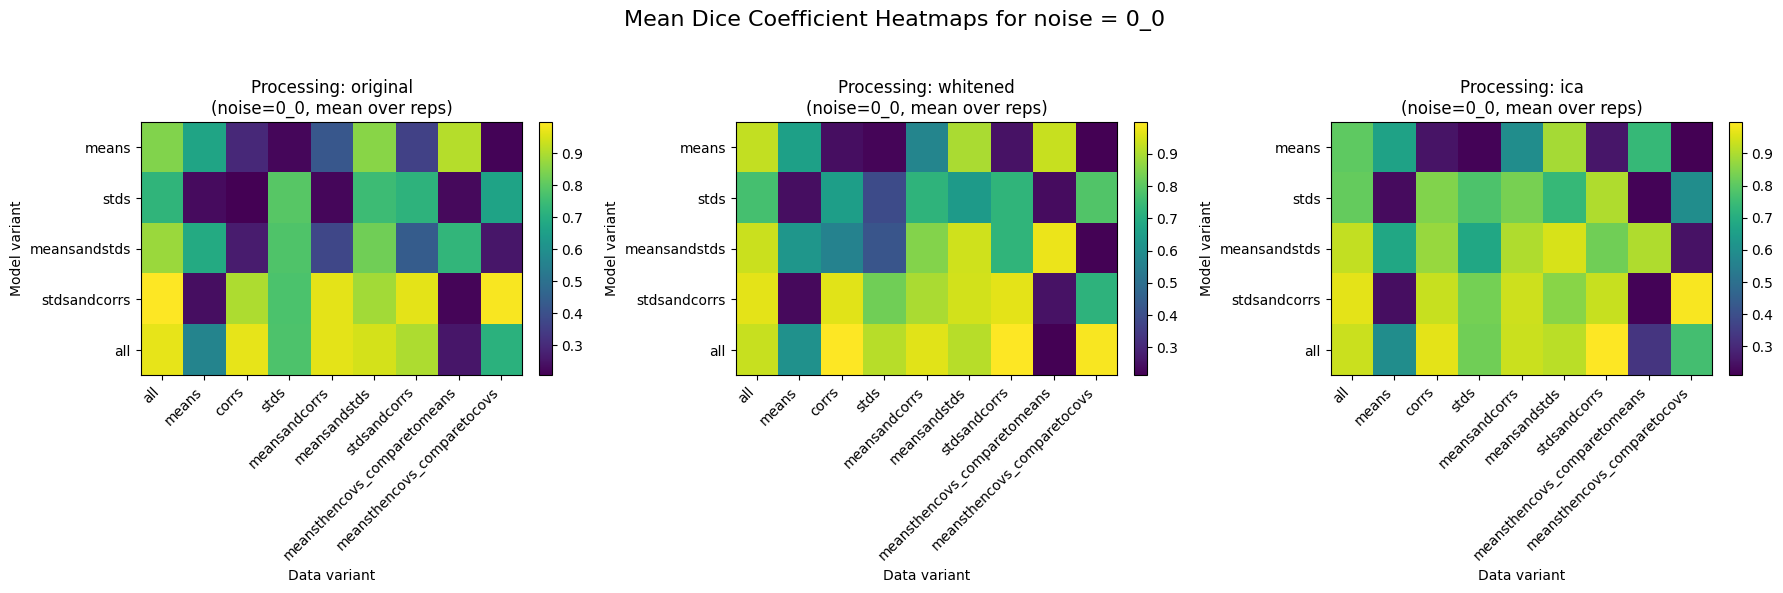

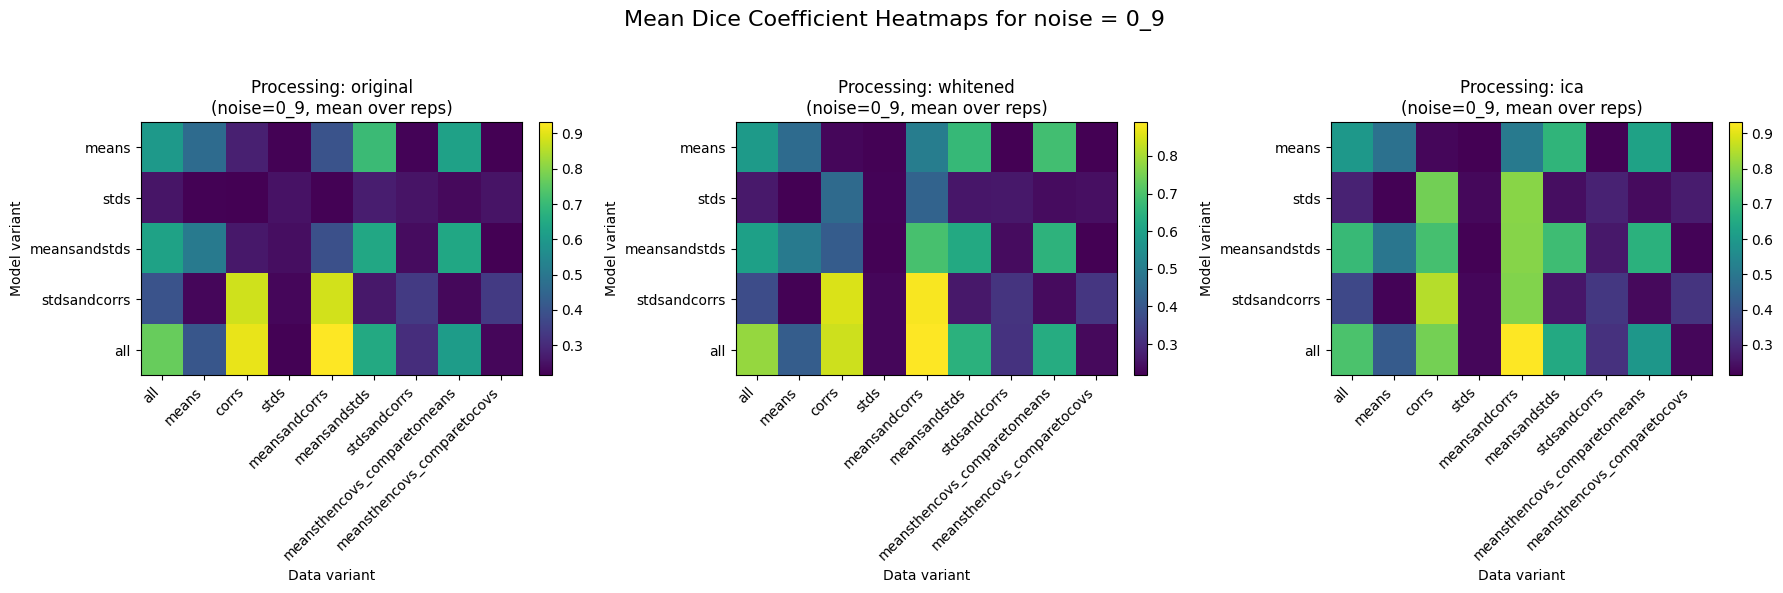

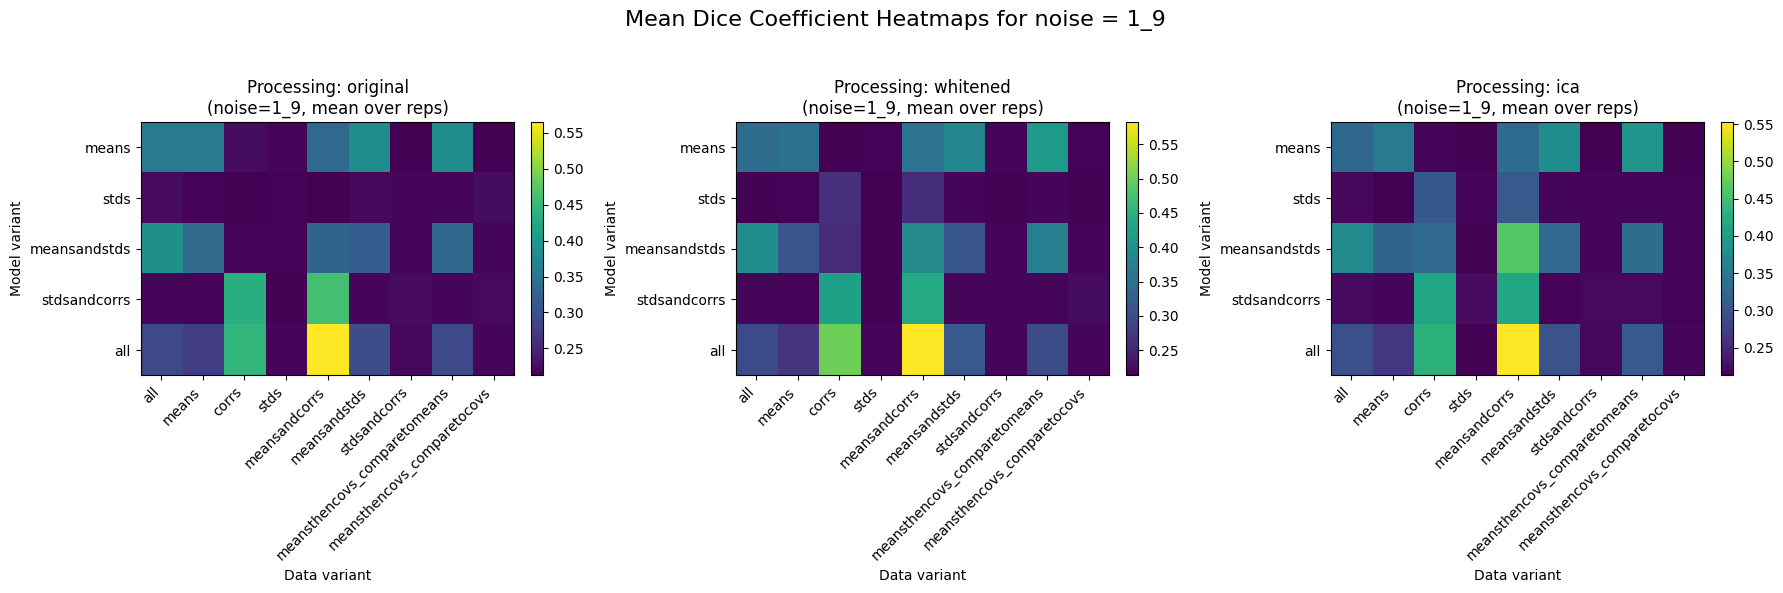

In [10]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import re

# Directory where result files are saved
results_dir = "/well/win-fmrib-analysis/users/psz102/git_repos/osl-dynamics/examples/simulation/results_hmm_variants_with_noise"

# Define the model and data variants (using underscores only)
model_names = ['means', 'stds', 'meansandstds', 'stdsandcorrs', 'all']
data_names  = ['all', 'means', 'corrs', 'stds', 'meansandcorrs', 'meansandstds', 'stdsandcorrs',
               'meansthencovs_comparetomeans', 'meansthencovs_comparetocovs']

# Define expected processing types (and the order for plotting)
expected_proc = ['original', 'whitened', 'ica']
proc_order = ['original', 'whitened', 'ica']

# Define noise levels of interest.
noise_levels = ["0_0", "0_9", "1_9"]

# Instead of a single matrix per (noise,proc), we'll aggregate dice values over repetitions.
# For each noise level and processing type, create a dictionary mapping (i,j) -> list of dice values.
dice_lists = { noise: { proc: { (i, j): [] 
                                for i in range(len(model_names))
                                for j in range(len(data_names)) }
                        for proc in expected_proc }
               for noise in noise_levels }

# Compile a regex pattern to parse filenames.
pattern = re.compile(
    r"^results_(?P<model>[^_]+)_(?P<data>.+?)_(?P<proc>original|whitened|ica)_noise_(?P<noise>.+)_rep(?P<rep>\d+)\.pkl$"
)

# Loop over each file in the results directory.
for fname in os.listdir(results_dir):
    if not fname.endswith(".pkl"):
        continue

    m = pattern.match(fname)
    if not m:
        print(f"Filename did not match expected pattern: {fname}")
        continue

    model_part = m.group("model")
    data_part  = m.group("data")
    proc_raw   = m.group("proc")
    noise_str  = m.group("noise")
    # rep is loaded but not used separately because we aggregate all repetitions
    rep = int(m.group("rep"))

    # Only process files for the specified noise levels.
    if noise_str not in noise_levels:
        continue

    # Map processing string to expected type.
    if "ica" in proc_raw:
        proc_type = "ica"
    elif "whitened" in proc_raw:
        proc_type = "whitened"
    elif "original" in proc_raw:
        proc_type = "original"
    else:
        print(f"Warning: Processing type '{proc_raw}' from file {fname} not recognized.")
        continue

    # Map model and data parts to predefined lists.
    try:
        i = model_names.index(model_part)
        j = data_names.index(data_part)
    except ValueError:
        print(f"Warning: Model or data variant from file {fname} not found in predefined lists.")
        continue

    # Load the result file and extract the dice coefficient.
    with open(os.path.join(results_dir, fname), "rb") as f:
        res = pickle.load(f)
    dice_val = res.get("dice", np.nan)

    # Append the dice value for this (i,j) cell.
    dice_lists[noise_str][proc_type][(i, j)].append(dice_val)

# Now, compute the mean dice matrix for each noise level and processing type.
mean_dice_matrices = { noise: { proc: np.full((len(model_names), len(data_names)), np.nan)
                                 for proc in expected_proc }
                       for noise in noise_levels }

for noise in noise_levels:
    for proc in expected_proc:
        for i in range(len(model_names)):
            for j in range(len(data_names)):
                values = dice_lists[noise][proc][(i, j)]
                if values:
                    mean_dice_matrices[noise][proc][i, j] = np.nanmean(values)
                else:
                    mean_dice_matrices[noise][proc][i, j] = np.nan

# Now create one figure per noise level showing the mean dice heatmaps.
for noise in noise_levels:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for ax, proc in zip(axes, proc_order):
        mat = mean_dice_matrices[noise][proc]
        im = ax.imshow(mat, cmap="viridis", aspect="auto")
        ax.set_xticks(np.arange(len(data_names)))
        ax.set_xticklabels(data_names, rotation=45, ha="right")
        ax.set_yticks(np.arange(len(model_names)))
        ax.set_yticklabels(model_names)
        ax.set_xlabel("Data variant")
        ax.set_ylabel("Model variant")
        ax.set_title(f"Processing: {proc}\n(noise={noise}, mean over reps)")
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.suptitle(f"Mean Dice Coefficient Heatmaps for noise = {noise}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


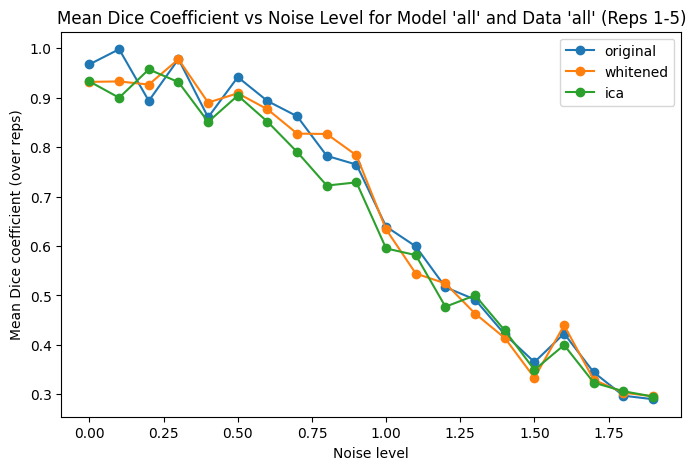

In [4]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import re

# Directory where result files are saved
results_dir = "/well/win-fmrib-analysis/users/psz102/git_repos/osl-dynamics/examples/simulation/results_hmm_variants_with_noise"

# Define expected processing types (and their plotting order)
expected_proc = ['original', 'whitened', 'ica']

# Define noise levels from 0 to 0.9 (float values for plotting)
# noise_levels_float = [i/10 for i in range(10)]
noise_levels_float = [i/10 for i in range(20)]
# For filenames, noise values are formatted with an underscore instead of a dot
noise_levels_str = [f"{x:.1f}".replace('.', '_') for x in noise_levels_float]

# Initialize a dictionary to store dice coefficients.
# Structure: dice_data[proc][noise_str] = list of dice_values (one per repetition)
dice_data = {proc: {noise: [] for noise in noise_levels_str} for proc in expected_proc}

# Compile a regex pattern to parse filenames.
pattern = re.compile(
    r"^results_(?P<model>[^_]+)_(?P<data>.+?)_(?P<proc>original|whitened|ica)_noise_(?P<noise>.+)_rep(?P<rep>\d+)\.pkl$"
)

# Loop over each file in the results directory.
for fname in os.listdir(results_dir):
    if not fname.endswith(".pkl"):
        continue

    m = pattern.match(fname)
    if not m:
        print(f"Filename did not match expected pattern: {fname}")
        continue

    # We only want files with model 'all' and data 'all'
    if m.group("model") != "all" or m.group("data") != "all":
        continue

    proc_type = m.group("proc")  # Should be one of our expected_proc
    noise_str  = m.group("noise") # e.g., "0_0", "0_1", ..., "0_9"
    rep = int(m.group("rep"))
    
    # Only process noise levels in our defined list and repetitions 1 to 5.
    if noise_str not in noise_levels_str or rep not in range(1,20):
        continue

    # Load the result file and extract the dice coefficient.
    with open(os.path.join(results_dir, fname), "rb") as f:
        res = pickle.load(f)
    dice_val = res.get("dice", np.nan)

    # Save the dice value in the dictionary.
    dice_data[proc_type][noise_str].append(dice_val)

# Compute the mean dice for each processing type and noise level.
mean_dice_data = {proc: [] for proc in expected_proc}
for proc in expected_proc:
    for noise_str in noise_levels_str:
        values = dice_data[proc][noise_str]
        if values:
            mean_val = np.nanmean(values)
        else:
            mean_val = np.nan
        mean_dice_data[proc].append(mean_val)

# Plot the mean dice coefficient vs. noise level as a line graph.
plt.figure(figsize=(8, 5))
for proc in expected_proc:
    plt.plot(noise_levels_float, mean_dice_data[proc], marker='o', label=proc)

plt.xlabel("Noise level")
plt.ylabel("Mean Dice coefficient (over reps)")
plt.title("Mean Dice Coefficient vs Noise Level for Model 'all' and Data 'all' (Reps 1-5)")
plt.legend()
plt.grid(False)
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Set bottom and left spines to black
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
plt.show()


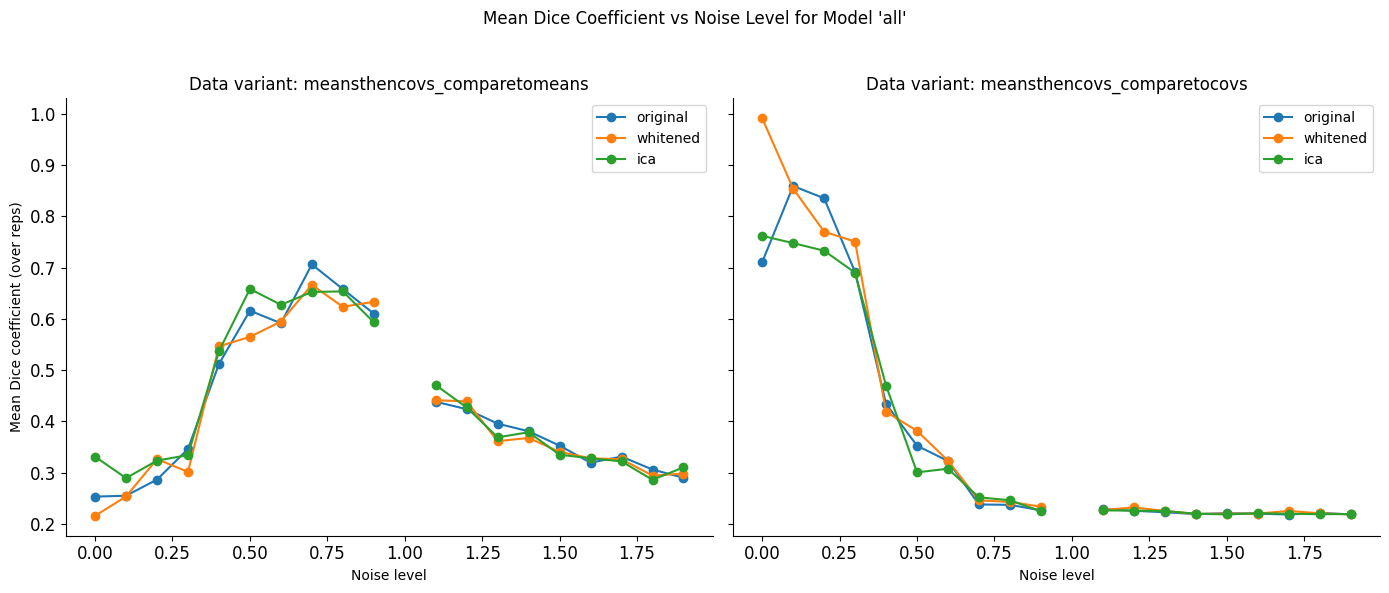

In [7]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import re

# Directory where result files are saved
results_dir = "/well/win-fmrib-analysis/users/psz102/git_repos/osl-dynamics/examples/simulation/results_hmm_variants_with_noise"

# Define expected processing types (and their plotting order)
expected_proc = ['original', 'whitened', 'ica']

# Define noise levels from 0 to 0.9 (float values for plotting)
noise_levels_float = [i/10 for i in range(20)]
# For filenames, noise values are formatted with an underscore instead of a dot
noise_levels_str = [f"{x:.1f}".replace('.', '_') for x in noise_levels_float]

# Define desired data variants and the desired model
desired_data_variants = ['meansthencovs_comparetomeans', 'meansthencovs_comparetocovs']
desired_model = 'all'

# Initialize a dictionary to store dice coefficients.
# Structure: dice_data[data_variant][proc][noise_str] = list of dice_values (one per repetition)
dice_data = { dv: { proc: { noise: [] for noise in noise_levels_str }
                   for proc in expected_proc }
              for dv in desired_data_variants }

# Compile a regex pattern to parse filenames.
pattern = re.compile(
    r"^results_(?P<model>[^_]+)_(?P<data>.+?)_(?P<proc>original|whitened|ica)_noise_(?P<noise>.+)_rep(?P<rep>\d+)\.pkl$"
)

# Loop over each file in the results directory.
for fname in os.listdir(results_dir):
    if not fname.endswith(".pkl"):
        continue

    m = pattern.match(fname)
    if not m:
        print(f"Filename did not match expected pattern: {fname}")
        continue

    model_part = m.group("model")
    data_part  = m.group("data")
    proc_raw   = m.group("proc")
    noise_str  = m.group("noise")
    rep = int(m.group("rep"))

    # Only process files for the desired model and data variants.
    if model_part != desired_model or data_part not in desired_data_variants:
        continue

    # Only process noise levels in our defined list and repetitions 1 to 5.
    if noise_str not in noise_levels_str or rep not in range(1, 21):
        continue

    # Determine processing type.
    if "ica" in proc_raw:
        proc_type = "ica"
    elif "whitened" in proc_raw:
        proc_type = "whitened"
    elif "original" in proc_raw:
        proc_type = "original"
    else:
        print(f"Warning: Processing type '{proc_raw}' from file {fname} not recognized.")
        continue

    # Load the result file and extract the dice coefficient.
    with open(os.path.join(results_dir, fname), "rb") as f:
        res = pickle.load(f)
    dice_val = res.get("dice", np.nan)

    # Append the dice value to the list for the corresponding data variant, processing type, and noise.
    dice_data[data_part][proc_type][noise_str].append(dice_val)

# Compute the mean dice for each processing type and noise level for each data variant.
mean_dice_data = { dv: { proc: [] for proc in expected_proc } for dv in desired_data_variants }
for dv in desired_data_variants:
    for proc in expected_proc:
        for noise_str in noise_levels_str:
            values = dice_data[dv][proc][noise_str]
            if values:
                mean_val = np.nanmean(values)
            else:
                mean_val = np.nan
            mean_dice_data[dv][proc].append(mean_val)

# Create one figure with two subplots (one per data variant)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
for ax, dv in zip(axes, desired_data_variants):
    for proc in expected_proc:
        ax.plot(noise_levels_float, mean_dice_data[dv][proc], marker='o', label=proc)
    ax.set_xlabel("Noise level")
    ax.set_title(f"Data variant: {dv}")
    ax.grid(False)
    # Set tick parameters: black ticks with larger font size
    ax.tick_params(axis='both', which='both', labelsize=12, colors='black')
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Set bottom and left spines to black
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.legend()

axes[0].set_ylabel("Mean Dice coefficient (over reps)")
plt.suptitle("Mean Dice Coefficient vs Noise Level for Model 'all'")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


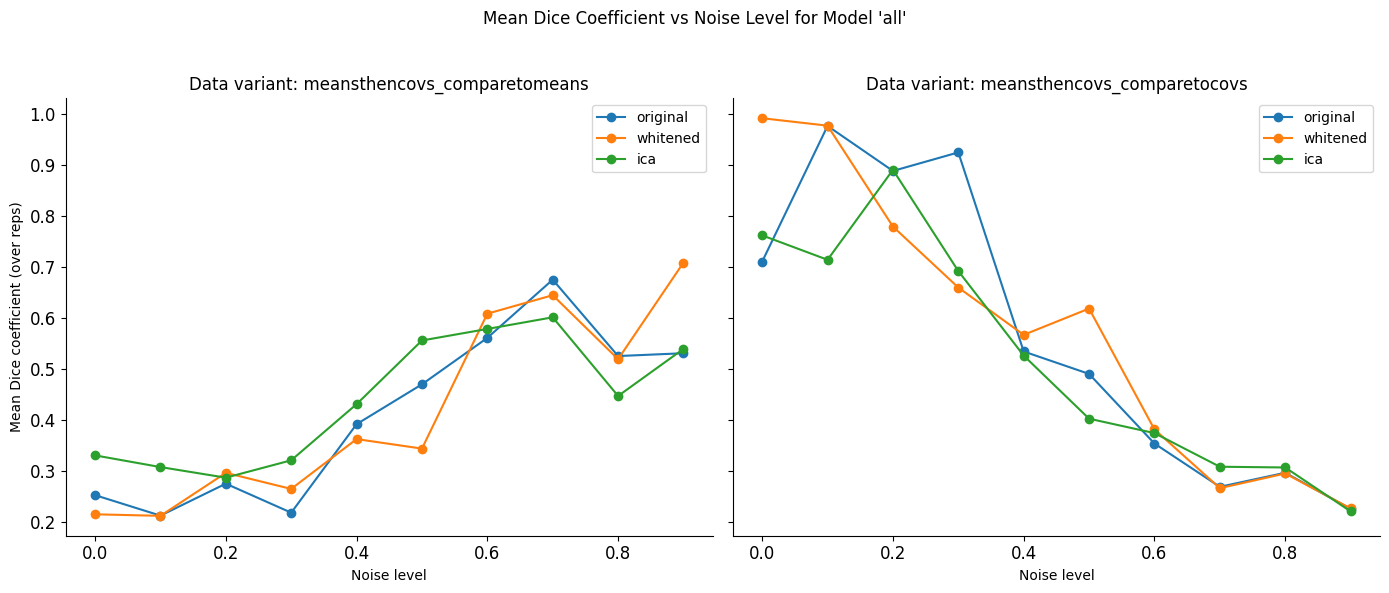

In [8]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import re

# Directory where result files are saved
results_dir = "/well/win-fmrib-analysis/users/psz102/git_repos/osl-dynamics/examples/simulation/results_hmm_variants_with_noise"

# Define expected processing types (and their plotting order)
expected_proc = ['original', 'whitened', 'ica']

# Define noise levels from 0 to 0.9 (float values for plotting)
noise_levels_float = [i/10 for i in range(20)]
# For filenames, noise values are formatted with an underscore instead of a dot
noise_levels_str = [f"{x:.1f}".replace('.', '_') for x in noise_levels_float]

# Define desired data variants and the desired model
desired_data_variants = ['meansthencovs_comparetomeans', 'meansthencovs_comparetocovs']
desired_model = 'all'

# Initialize a dictionary to store dice coefficients.
# Structure: dice_data[data_variant][proc][noise_str] = list of dice_values (one per repetition)
dice_data = { dv: { proc: { noise: [] for noise in noise_levels_str }
                   for proc in expected_proc }
              for dv in desired_data_variants }

# Compile a regex pattern to parse filenames.
pattern = re.compile(
    r"^results_(?P<model>[^_]+)_(?P<data>.+?)_(?P<proc>original|whitened|ica)_noise_(?P<noise>.+)_rep(?P<rep>\d+)\.pkl$"
)

# Loop over each file in the results directory.
for fname in os.listdir(results_dir):
    if not fname.endswith(".pkl"):
        continue

    m = pattern.match(fname)
    if not m:
        print(f"Filename did not match expected pattern: {fname}")
        continue

    model_part = m.group("model")
    data_part  = m.group("data")
    proc_raw   = m.group("proc")
    noise_str  = m.group("noise")
    rep = int(m.group("rep"))

    # Only process files for the desired model and data variants.
    if model_part != desired_model or data_part not in desired_data_variants:
        continue

    # Only process noise levels in our defined list and repetitions 1 to 5.
    if noise_str not in noise_levels_str or rep not in range(1, 2):
        continue

    # Determine processing type.
    if "ica" in proc_raw:
        proc_type = "ica"
    elif "whitened" in proc_raw:
        proc_type = "whitened"
    elif "original" in proc_raw:
        proc_type = "original"
    else:
        print(f"Warning: Processing type '{proc_raw}' from file {fname} not recognized.")
        continue

    # Load the result file and extract the dice coefficient.
    with open(os.path.join(results_dir, fname), "rb") as f:
        res = pickle.load(f)
    dice_val = res.get("dice", np.nan)

    # Append the dice value to the list for the corresponding data variant, processing type, and noise.
    dice_data[data_part][proc_type][noise_str].append(dice_val)

# Compute the mean dice for each processing type and noise level for each data variant.
mean_dice_data = { dv: { proc: [] for proc in expected_proc } for dv in desired_data_variants }
for dv in desired_data_variants:
    for proc in expected_proc:
        for noise_str in noise_levels_str:
            values = dice_data[dv][proc][noise_str]
            if values:
                mean_val = np.nanmean(values)
            else:
                mean_val = np.nan
            mean_dice_data[dv][proc].append(mean_val)

# Create one figure with two subplots (one per data variant)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
for ax, dv in zip(axes, desired_data_variants):
    for proc in expected_proc:
        ax.plot(noise_levels_float, mean_dice_data[dv][proc], marker='o', label=proc)
    ax.set_xlabel("Noise level")
    ax.set_title(f"Data variant: {dv}")
    ax.grid(False)
    # Set tick parameters: black ticks with larger font size
    ax.tick_params(axis='both', which='both', labelsize=12, colors='black')
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Set bottom and left spines to black
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.legend()

axes[0].set_ylabel("Mean Dice coefficient (over reps)")
plt.suptitle("Mean Dice Coefficient vs Noise Level for Model 'all'")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
